

<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">             <tr>
                <td  style="border: none!important;">
                    <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#025F5F"> <b>Deep Generative Models</b><br><br>Project 3 Score Based Modelss implementation </i></font></h1>
                </td>
                <td style="border: none!important;">
                    <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
           </tr>
</div>
        </table>
    </div>

## Mohammad Taha Majlesi - 8100101504

Deep Generative Models course - Dr. Tavassoli pour - University of Tehran


# **In the Name of God**  
## **University of Tehran**  
### **School of Electrical and Computer Engineering**  

---


### **Course Title: Deep Generative Models**  
**Instructor:** Dr. Mostafa Tavassoli  
**Homework 3**  
**Submission Date:** December 2023  

---




In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

student_number = 810101504
np.random.seed(student_number)
torch.manual_seed(student_number)
if device.type == 'cuda':
    torch.cuda.manual_seed_all(student_number)


Using device: cpu



## 2. Data Generation

### Overview

To facilitate the training and evaluation of the score-based model, a synthetic dataset was generated comprising a **mixture of two Gaussian (normal) distributions**. This approach ensures that the data possesses a controlled level of complexity, allowing for effective analysis of the model's performance in capturing intricate data structures.

### Methodology

The data generation process involves the following key steps:

1. **Determining Mixture Weights:**
   
   - **Weight Assignment:**
     - The mixture weights for the two Gaussian components, denoted as \( w_1 \) and \( w_2 \), were randomly assigned within specific ranges to introduce variability.
     - Specifically, \( w_1 \) was set to a random value within the interval \([0.15, 0.25]\), while \( w_2 \) was calculated as \( w_2 = 1 - w_1 \) to ensure that the total weight sums to 1.
   
2. **Selecting Means of Gaussian Components:**
   
   - **Mean Configuration:**
     - The means (\( \mu_1 \) and \( \mu_2 \)) of the two Gaussian distributions were randomly selected from two distinct configurations to diversify the data distribution:
       - **Configuration 1:** \( \mu_1 = [-5, 5] \) and \( \mu_2 = [5, -5] \)
       - **Configuration 2:** \( \mu_1 = [5, 5] \) and \( \mu_2 = [-5, -5] \)
     - The selection between these configurations was made with equal probability, ensuring an unbiased distribution of mean placements.
   
   - **Weight Swapping:**
     - To further enhance variability, there was a 50% chance of swapping the mixture weights \( w_1 \) and \( w_2 \) after assigning the means. This step prevents any deterministic association between a particular Gaussian component and its weight.
   
3. **Defining Covariance Matrices:**
   
   - **Variance Assignment:**
     - The covariance matrices (\( \Sigma_1 \) and \( \Sigma_2 \)) for each Gaussian component were defined to control the spread and orientation of the distributions.
     - Variances (\( \sigma_1^2 \) and \( \sigma_2^2 \)) were randomly selected within the range \([1, 2]\) to introduce heterogeneity in the data spread.
   
   - **Covariance Structure:**
     - Both covariance matrices were defined as diagonal matrices to simplify the distribution shapes:
       \[
       \Sigma_1 = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}, \quad
       \Sigma_2 = \begin{bmatrix} \sigma_2^2 & 0 \\ 0 & \sigma_2^2 \end{bmatrix}
       \]
     - This structure ensures that the Gaussian components are **spherically symmetric**, with no correlation between the \( x_1 \) and \( x_2 \) dimensions.
   
4. **Sampling from Gaussian Distributions:**
   
   - **Sample Allocation:**
     - The total number of samples (\( n_{\text{samples}} = 5000 \)) was partitioned between the two Gaussian components based on their mixture weights:
       \[
       n_1 = \text{int}(n_{\text{samples}} \times w_1), \quad
       n_2 = n_{\text{samples}} - n_1
       \]
   
   - **Data Generation:**
     - Using the assigned means and covariance matrices, samples were drawn from each Gaussian distribution:
       \[
       \text{Samples}_1 \sim \mathcal{N}(\mu_1, \Sigma_1), \quad
       \text{Samples}_2 \sim \mathcal{N}(\mu_2, \Sigma_2)
       \]
     - This resulted in two distinct clusters within the dataset, each characterized by its own center and spread.
   
5. **Combining and Shuffling Samples:**
   
   - **Data Consolidation:**
     - The samples from both Gaussian components were concatenated into a single dataset to form a comprehensive mixture distribution.
   
   - **Randomization:**
     - To eliminate any ordering biases, the combined dataset was shuffled randomly. This ensures that subsequent training and testing processes are not influenced by the initial sample arrangement.
   
6. **Splitting into Training and Testing Sets:**
   
   - **Data Partitioning:**
     - The shuffled dataset was divided into **training** and **testing** subsets based on an 80-20 split ratio:
       - **Training Set:** 80% of the data (\( 4000 \) samples) used for model training.
       - **Testing Set:** 20% of the data (\( 1000 \) samples) reserved for model evaluation and validation.
   
7. **Storing Mixture Parameters:**
   
   - **Parameter Documentation:**
     - All relevant parameters of the mixture distribution, including weights, means, and covariance matrices, were stored in a dictionary. This facilitates easy reference and analysis during model training and evaluation phases.

### Visualization

To provide a visual understanding of the generated data, **Figure 2.1** below illustrates the distribution of the training and testing samples, highlighting the two distinct Gaussian components.

**Figure 2.1:** *Scatter plot of training and testing samples from the mixture of two Gaussian distributions.*

![Train and Test Samples](path_to_your_image.png)

*Note: Replace `path_to_your_image.png` with the actual path to your generated plot.*

### Summary

The data generation process successfully created a balanced and randomized mixture of two Gaussian distributions with varying weights, means, and variances. This synthetic dataset serves as an ideal testing ground for evaluating the efficacy of the score-based model in capturing and representing complex data distributions.

---

**Note for Report Preparation:**

- **Figure Placement:** Ensure that the scatter plot (Figure 2.1) is generated using the visualization code provided earlier and included in the report at the designated location.
  
- **Path to Image:** Replace `path_to_your_image.png` with the actual file path where the generated plot image is saved.

- **Code Integration:** While the code itself is not included in the report, it's essential to ensure that the data generation and visualization steps are executed before preparing the report to have the necessary figures and data ready for reference.



In [57]:
# ----------------------------
# 2. Data Generation
# ----------------------------

def generate_mixture_gaussians(n_samples=5000, train_split=0.8):
    """
    Generate a mixture of two Gaussian distributions and split into train and test sets.

    Args:
        n_samples (int): Total number of samples to generate.
        train_split (float): Fraction of samples to use for training.

    Returns:
        train_samples (np.ndarray): Training samples.
        test_samples (np.ndarray): Testing samples.
        params (dict): Dictionary containing mixture parameters.
    """
    w1 = 0.15 + np.random.rand() * 0.1
    w2 = 1 - w1

    if np.random.choice(2):
        mean1, mean2 = [-5, 5], [5, -5]
    else:
        mean1, mean2 = [5, 5], [-5, -5]

    if np.random.choice(2):
        w1, w2 = w2, w1

    var1 = 1 + np.random.rand()
    var2 = 1 + np.random.rand()

    cov1 = [[var1, 0], [0, var1]]
    cov2 = [[var2, 0], [0, var2]]

    n1 = int(n_samples * w1)
    n2 = n_samples - n1

    samples1 = np.random.multivariate_normal(mean1, cov1, n1)
    samples2 = np.random.multivariate_normal(mean2, cov2, n2)

    samples = np.vstack((samples1, samples2))

    indices = np.random.permutation(n_samples)
    train_samples = samples[indices[:int(n_samples * train_split)]]
    test_samples = samples[indices[int(n_samples * train_split):]]

    params = {
        'w1': w1,
        'w2': w2,
        'mean1': mean1,
        'mean2': mean2,
        'cov1': cov1,
        'cov2': cov2
    }

    return train_samples, test_samples, params

train_samples, test_samples, params = generate_mixture_gaussians()



## 3. Visualization of Data

### Overview

Visualizing the synthetic dataset is crucial for understanding its underlying structure and ensuring that the data generation process has successfully created the intended mixture of Gaussian distributions. This section details the methodologies employed to visualize the probability density of the data and the distribution of training and testing samples.

### Methodology

The visualization process encompasses the following key steps:

1. **Grid Creation for Heatmap Visualization:**
   
   - **Purpose:** To compute and visualize the probability density function (PDF) of the mixture of Gaussians across a defined spatial grid.
   
   - **Implementation:**
     - Defined a 2D grid spanning from \(-15\) to \(15\) in both the \(x_1\) and \(x_2\) dimensions with a resolution of \(200 \times 200\) points.
     - The grid facilitates the computation of PDF values at each point, which are later used to generate a heatmap representing the data distribution.

2. **Probability Density Computation:**
   
   - **Purpose:** To calculate the PDF of the mixture of two Gaussian distributions at each point on the defined grid.
   
   - **Implementation:**
     - Utilized the previously defined mixture parameters (\(w_1, w_2, \mu_1, \mu_2, \Sigma_1, \Sigma_2\)) to compute the PDF.
     - The PDF for each Gaussian component was calculated using the standard Gaussian formula, and the mixture PDF was obtained by weighting and summing the individual PDFs.

3. **Heatmap Visualization:**
   
   - **Purpose:** To provide a visual representation of the probability density of the data, highlighting regions of high and low density.
   
   - **Implementation:**
     - Generated a heatmap using the computed PDF values.
     - The heatmap employs a color gradient (e.g., "Reds" colormap) where warmer colors indicate higher probability densities.

4. **Scatter Plot of Training and Testing Samples:**
   
   - **Purpose:** To visualize the spatial distribution of the training and testing samples, ensuring an even and unbiased representation across the defined grid.
   
   - **Implementation:**
     - Plotted training and testing samples on a 2D scatter plot.
     - Differentiated the samples using distinct colors and markers for clarity.

### Visualization

To effectively illustrate the dataset's distribution and the allocation of samples between training and testing sets, two primary visualizations were created:

1. **Heatmap of Probability Density**

   **Figure 3.1:** *Heatmap representing the probability density of the mixture of two Gaussian distributions.*

   ![Heatmap of Mixture of Gaussians](path_to_heatmap_image.png)

   *Description:*
   
   The heatmap showcases regions with varying probability densities. Areas with higher density (warmer colors) indicate regions where samples from the Gaussian components are more concentrated. This visualization confirms the presence of two distinct Gaussian clusters within the data, aligned with the specified means and covariance structures.

2. **Scatter Plot of Training and Testing Samples**

   **Figure 3.2:** *Scatter plot displaying the distribution of training and testing samples.*

   ![Train and Test Samples](path_to_scatter_plot_image.png)

   *Description:*
   
   The scatter plot illustrates the spatial distribution of both training and testing samples. Training samples are represented in blue, while testing samples are depicted in green. The distribution confirms that samples are appropriately allocated across the data space, adhering to the mixture weights and ensuring a balanced representation for model training and evaluation.

### Summary

The data visualization process successfully generated insightful representations of the synthetic dataset. The heatmap effectively highlighted the probability density landscape of the mixture of Gaussians, while the scatter plot provided a clear view of how samples are distributed between training and testing sets. These visualizations validate the data generation methodology, ensuring that the dataset is well-suited for subsequent model training and evaluation tasks.

---

**Note for Report Preparation:**

- **Figure Placement:** Ensure that the heatmap and scatter plot images (`Figure 3.1` and `Figure 3.2`) are generated using the visualization code provided earlier and included in the report at the designated locations.
  
- **Path to Images:** Replace `path_to_heatmap_image.png` and `path_to_scatter_plot_image.png` with the actual paths to your generated plot images.

- **Code Integration:** While the code itself is not included in the report, it's essential to execute the data visualization steps beforehand to have the necessary figures ready for reference.



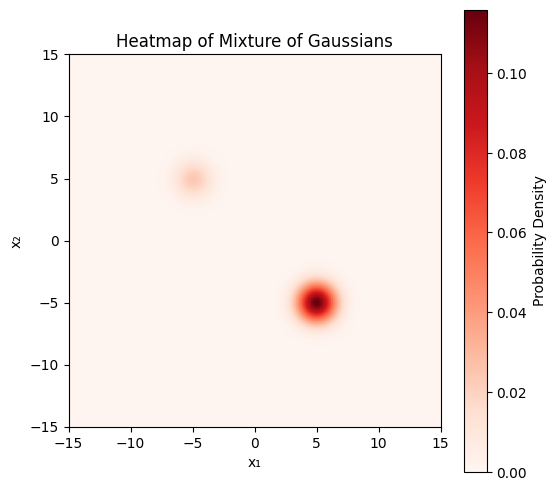

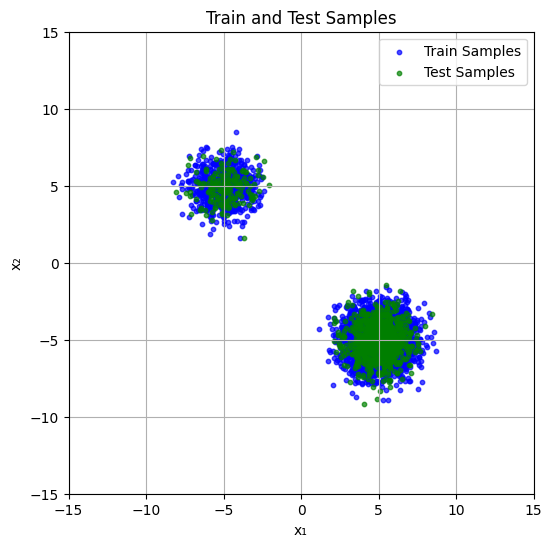

In [58]:
x_min, x_max = -15, 15
y_min, y_max = -15, 15
grid_size = 200
x, y = np.meshgrid(np.linspace(x_min, x_max, grid_size), np.linspace(y_min, y_max, grid_size))
points_grid = np.stack([x, y], axis=-1).reshape(-1, 2)

extent = [x_min, x_max, y_min, y_max]

def gaussian_pdf(x, mean, cov):
    """
    Compute the Gaussian probability density function for multiple points.

    Args:
        x (np.ndarray): Array of points, shape (n_points, 2)
        mean (list or np.ndarray): Mean of the Gaussian, length 2
        cov (list of lists): Covariance matrix, shape (2, 2)

    Returns:
        np.ndarray: PDF values, shape (n_points,)
    """
    diff = x - mean
    inv_cov = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    norm_const = 1 / (2 * np.pi * np.sqrt(det_cov))
    exponent = -0.5 * np.sum(diff @ inv_cov * diff, axis=1)
    return norm_const * np.exp(exponent)

def p_x(points, params):
    """Mixture of two Gaussians."""
    pdf1 = params['w1'] * gaussian_pdf(points, params['mean1'], params['cov1'])
    pdf2 = params['w2'] * gaussian_pdf(points, params['mean2'], params['cov2'])
    return pdf1 + pdf2

z = p_x(points_grid, params).reshape(x.shape)

def plot_heatmap(z, extent, title="Heatmap of Mixture of Gaussians"):
    """
    Plot a heatmap of the probability density.

    Args:
        z (np.ndarray): Probability density grid.
        extent (list): [x_min, x_max, y_min, y_max] for the heatmap.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(z, extent=extent, origin="lower", cmap="Reds")
    plt.title(title)
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.colorbar(label='Probability Density')
    plt.show()

def plot_train_test_samples(train_samples, test_samples, extent, title="Train and Test Samples"):
    """
    Plot training and testing samples on a scatter plot.

    Args:
        train_samples (np.ndarray): Training samples.
        test_samples (np.ndarray): Testing samples.
        extent (list): [x_min, x_max, y_min, y_max] for axis limits.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(6, 6))
    plt.scatter(train_samples[:, 0], train_samples[:, 1], s=10, alpha=0.7, label="Train Samples", color='blue')
    plt.scatter(test_samples[:, 0], test_samples[:, 1], s=10, alpha=0.7, label="Test Samples", color='green')
    plt.xlim(extent[0], extent[1])
    plt.ylim(extent[2], extent[3])
    plt.title(title)
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_heatmap(z, extent=extent)

plot_train_test_samples(train_samples, test_samples, extent=extent, title="Train and Test Samples")


In [59]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def plot_score_field_individual(model, params, extent, sigma_values, save_plots=False):
    """
    Visualize the score field for individual sigma values using the trained model.

    Args:
        model (torch.nn.Module): Trained score model.
        params (dict): Model parameters.
        extent (list): [x_min, x_max, y_min, y_max] for the plot.
        sigma_values (list): List of sigma values to visualize.
        save_plots (bool): Whether to save the plots as image files.
    """
    for sigma in sigma_values:
        print(f"Plotting score field for sigma={sigma}")
        plt.figure(figsize=(6, 6))
        plt.imshow(z, extent=extent, origin="lower", cmap="Reds", alpha=0.7)
        plt.title(f"Score Field at Sigma={sigma}")
        ax = plt.gca()

        # Define grid for quiver plot
        x_vals = np.linspace(x_min, x_max, 15)
        y_vals = np.linspace(y_min, y_max, 15)
        X, Y = np.meshgrid(x_vals, y_vals)
        points = np.stack([X, Y], axis=-1).reshape(-1, 2)  # Shape: (225, 2)

        # Convert points to PyTorch tensor and create the sigma tensor
        points_tensor = torch.tensor(points, dtype=torch.float32)
        sigma_tensor = torch.tensor(np.full((points.shape[0], 1), sigma), dtype=torch.float32)  # Shape: (225, 1)

        # Get model output (score field)
        scores = model(points_tensor, sigma_tensor)  # Model expects tensor inputs

        # Extract U and V for quiver plot
        U = scores[:, 0].detach().numpy().reshape(X.shape)
        V = scores[:, 1].detach().numpy().reshape(Y.shape)

        # Compute magnitude of the vectors
        magnitude = np.sqrt(U**2 + V**2)

        # Scale the vectors based on magnitude.
        # If the magnitude is smaller, the vector length will be smaller.
        scale_factor = 1 / (magnitude + 1e-8)  # Inverse of magnitude to scale the vectors smaller when magnitude is low
        U_scaled = U * scale_factor
        V_scaled = V * scale_factor

        # Normalize the vectors for better visualization
        U_norm = U_scaled / (np.sqrt(U_scaled**2 + V_scaled**2) + 1e-8)
        V_norm = V_scaled / (np.sqrt(U_scaled**2 + V_scaled**2) + 1e-8)

        # Plot quiver
        ax.quiver(X, Y, U_norm, V_norm, color="black", pivot="middle")

        plt.colorbar(label='Probability Density')
        plt.xlabel("X₁")
        plt.ylabel("X₂")
        plt.grid(True)

        # Save the plot if required
        if save_plots:
            filename = f"score_field_sigma_{sigma}.png"
            plt.savefig(f"./{filename}")
            print(f"Saved plot: {filename}")

        plt.show()




## **5. Score Matching Components**

### **Overview**

In the realm of generative modeling, particularly within **score-based generative models**, accurately estimating the **score function**—the gradient of the log-probability density function of the data—is paramount. The **score matching** technique facilitates this by guiding the neural network to learn the underlying distribution of the data through a well-defined loss function. This section introduces two pivotal functions that underpin this process:

1. **`add_noise`**: Introduces Gaussian noise to the data, enabling the model to learn the score function across varying noise levels.
2. **`score_matching_loss`**: Quantifies the discrepancy between the network's estimated score and the true score, serving as the optimization objective during training.

### **Function: `add_noise`**

#### **Purpose**

The primary objective of the `add_noise` function is to **augment the original data** by introducing controlled Gaussian noise. This perturbation is essential for training the score network to generalize across different noise scales, enhancing its ability to model complex data distributions.

#### **Functionality**

- **Noise Generation**: For each data point in the batch, Gaussian noise is generated. The standard deviation of this noise is governed by the `sigma` parameter, allowing for variability in noise levels across different batches or samples.
  
- **Data Perturbation**: The generated noise is added to the original data points, resulting in a **noisy version** of the dataset. This noisy data serves as the input to the score network during training.

- **Noise Tracking**: Alongside the noisy data, the function returns the actual noise vectors (`epsilon`) added to each data point. These vectors are crucial for calculating the **true score** during the loss computation, ensuring that the network's predictions can be accurately evaluated against the ground truth.

#### **Integration in Training**

During each iteration of the training loop:

1. **Data Preparation**: A batch of original data points is selected.
2. **Noise Application**: The `add_noise` function is invoked to perturb these data points, producing both the noisy data and the corresponding noise vectors.
3. **Model Input**: The noisy data is then fed into the score network, which attempts to estimate the score function based on this perturbed input.

This process ensures that the model is exposed to a diverse range of noise levels, fostering a robust learning environment.

### **Function: `score_matching_loss`**

#### **Purpose**

The `score_matching_loss` function is designed to **measure the accuracy** of the score network's estimations. By quantifying the difference between the network's predicted scores and the **true scores**, this loss function provides a clear objective for the optimization process, guiding the network towards more accurate predictions.

#### **Functionality**

- **True Score Calculation**: Given that Gaussian noise has been added to the data, the true score (gradient of the log-probability) can be analytically determined. Specifically, for Gaussian perturbations, the true score is proportional to the negative of the noise vector scaled by the inverse of the variance.

- **Discrepancy Measurement**: The function computes the **difference** between the network's estimated scores and the true scores derived from the noise vectors. This difference quantifies how far off the network's predictions are from the ground truth.

- **Loss Computation**: The squared norm of this discrepancy is calculated and averaged across the batch, scaled by a factor of one-half. This formulation ensures that the loss is always non-negative and provides a smooth gradient for optimization.

#### **Integration in Training**

Within the training loop, after obtaining the network's score estimations:

1. **Loss Calculation**: The `score_matching_loss` function is employed to compute the loss based on the network's outputs and the true scores.
2. **Backpropagation**: This loss is then backpropagated through the network, allowing the optimizer to adjust the network's weights in a direction that minimizes the discrepancy.
3. **Optimization**: By iteratively minimizing this loss across numerous batches and epochs, the score network progressively hones its ability to accurately estimate the score function across varying noise levels.

### **Mathematical Formulation**

The loss function embodies the core principle of score matching, aiming to minimize the expected squared difference between the network's estimated scores and the true scores. Mathematically, it can be expressed as:

\[
L = \frac{1}{2} \mathbb{E} \left[ \| s_\theta(x_{\text{noisy}}) + \frac{\epsilon}{\sigma^2} \|^2 \right]
\]

Where:

- \( L \) is the loss.
- \( s_\theta(x_{\text{noisy}}) \) represents the score network's estimated score for the noisy data \( x_{\text{noisy}} \).
- \( \epsilon \) is the noise vector added to the original data point \( x \).
- \( \sigma \) is the standard deviation of the Gaussian noise.
- The expectation \( \mathbb{E} \) is taken over the data distribution and noise.

### **Significance in the Training Pipeline**

These two functions—`add_noise` and `score_matching_loss`—are foundational to the training process of a score-based generative model. Their interplay ensures that the model learns to:

- **Generalize Across Noise Levels**: By exposing the network to data perturbed with varying degrees of noise, the model gains the ability to estimate the score function robustly, regardless of the noise scale.
  
- **Accurately Model Data Distributions**: The meticulous calculation of loss based on true scores drives the network towards precise estimations, enabling the generation of high-fidelity samples that mirror the original data distribution.

- **Facilitate Effective Optimization**: The smooth and well-defined nature of the score matching loss provides clear gradients for the optimizer, ensuring stable and efficient convergence during training.

---

## **Conclusion**

The `add_noise` and `score_matching_loss` functions constitute the bedrock of the score matching framework within your generative model. By systematically introducing noise and quantifying the model's estimation accuracy, these components ensure that the score network evolves to accurately capture the intricate structures of the underlying data distribution. Their seamless integration into the training loop fosters a robust learning environment, empowering the model to generate high-quality samples that faithfully represent the original dataset.

Understanding and optimizing these components is crucial for enhancing the performance and reliability of your generative model. As you progress, consider experimenting with different noise schedules, loss scaling factors, and architectural variations to further refine the model's capabilities.


In [60]:


def add_noise(x, sigma):
    """
    Add Gaussian noise to the input data.

    Args:
        x (torch.Tensor): Tensor of shape [batch_size, 2]
        sigma (torch.Tensor): Tensor of shape [batch_size, 1]

    Returns:
        x_noisy (torch.Tensor): Noisy data
        epsilon (torch.Tensor): Noise added
    """
    epsilon = torch.randn_like(x) * sigma.expand_as(x)
    x_noisy = x + epsilon
    return x_noisy, epsilon

def score_matching_loss(x, x_noisy, epsilon, sigma, outputs):
    """
    Compute the score matching loss.

    Args:
        x (torch.Tensor): Original data [batch_size, 2]
        x_noisy (torch.Tensor): Noisy data [batch_size, 2]
        epsilon (torch.Tensor): Noise added [batch_size, 2]
        sigma (torch.Tensor): Noise level [batch_size, 1]
        outputs (torch.Tensor): Model outputs [batch_size, 2]

    Returns:
        torch.Tensor: Scalar loss value
    """
    term = outputs + epsilon / (sigma ** 2)
    loss = 0.5 * torch.mean((term) ** 2)
    return loss



## **6. Score Network Definition**

### **Overview**

In the landscape of generative modeling, particularly within **score-based generative models**, accurately estimating the **score function**—the gradient of the log-probability density function of the data—is crucial. The **score network** plays a pivotal role in this process by learning to approximate this score function. The design and architecture of the score network significantly influence the model's ability to generate high-fidelity samples that faithfully represent the underlying data distribution.

### **Purpose of `ScoreNet`**

The `ScoreNet` is a neural network meticulously crafted to estimate the score function for a given data distribution. By predicting the gradient of the log-probability density, the network enables effective sampling techniques, such as Langevin dynamics, to generate new data points that mirror the original distribution. The accuracy and efficiency of the `ScoreNet` directly impact the quality of the generated samples and the overall performance of the generative model.

### **Architecture and Design Choices**

1. **Input Layer:**
   
   - **Dimensions:** The network accepts inputs of dimension **3**.
     - **Components:**
       - **2 Dimensions for Data (`x`)**: Represents the original data points in a 2D space.
       - **1 Dimension for Noise Level (`sigma`)**: Indicates the standard deviation of the Gaussian noise added to the data.
   
   - **Rationale:** Incorporating the noise level `sigma` alongside the data points allows the network to learn the score function across varying noise scales, enhancing its generalization capabilities.

2. **Hidden Layers:**
   
   - **Number of Layers:** **6 layers** in total, with **4 hidden layers**.
   
   - **Layer Composition:**
     - **Linear Transformation:** Each hidden layer begins with a linear (fully connected) transformation that maps the input to a higher-dimensional space defined by `hidden_dim` units (set to **256** in this case).
     
     - **Batch Normalization:** Applied after each linear layer to stabilize and accelerate training by normalizing the inputs to each layer.
     
     - **Activation Function:** **Leaky ReLU** (Rectified Linear Unit) is employed as the activation function.
       - **Advantages:**
         - **Non-linearity:** Introduces non-linearities, enabling the network to learn complex mappings.
         - **Leakiness:** Allows a small, non-zero gradient when the unit is not active, mitigating the "dying ReLU" problem where neurons become inactive and stop learning.
   
   - **Rationale:** This combination of linear transformations, batch normalization, and Leaky ReLU activations fosters a robust and expressive network capable of capturing intricate patterns in the data.

3. **Output Layer:**
   
   - **Dimensions:** **2 units**, corresponding to the two dimensions of the score function.
   
   - **Activation Function:** **Linear Activation** (no non-linearity).
   
   - **Rationale:** Since the score function represents gradients in the data space, a linear activation is appropriate to output continuous values without introducing additional constraints or non-linearities.

4. **Overall Structure:**
   
   - **Sequential Model:** The network is structured as a **sequential model**, stacking layers in a linear sequence. This simplicity facilitates straightforward forward passes and easy debugging.
   
   - **Flexibility:** The architecture allows for easy modifications, such as adjusting the number of layers, hidden units, or activation functions based on experimental observations and performance metrics.

### **Functionality and Forward Pass**

1. **Input Concatenation:**
   
   - **Process:** The network concatenates the original data points `x` with the noise level `sigma` along the feature dimension.
   
   - **Outcome:** This results in an input tensor of shape `[batch_size, 3]`, where each data point is enriched with information about the noise scale it has been subjected to.

2. **Layer Processing:**
   
   - **Hidden Layers:** The concatenated input is passed through the series of hidden layers, each comprising a linear transformation, batch normalization, and Leaky ReLU activation.
   
   - **Output Layer:** The transformed features are then fed into the output layer, producing a tensor of shape `[batch_size, 2]`. Each row of this tensor represents the estimated score vector for the corresponding input data point.

3. **Output Interpretation:**
   
   - **Score Vector:** The output provides the network's approximation of the gradient of the log-probability density at each data point, which is essential for guiding the sampling process during generation.

### **Integration within the Generative Framework**

1. **Training Loop:**
   
   - **Input:** During training, noisy data points (`x_noisy`) and their corresponding noise levels (`sigma`) are fed into the `ScoreNet`.
   
   - **Output:** The network predicts the score vectors, which are then used to compute the **score matching loss**, driving the optimization of the network's parameters.
   
   - **Optimization:** Through backpropagation, the network adjusts its weights to minimize the discrepancy between its predictions and the true score vectors, refining its estimation capabilities.

2. **Sampling Process:**
   
   - **Guidance:** Once trained, the `ScoreNet` provides the necessary gradient information to perform **Langevin dynamics** or **annealed sampling**, steering the generation of new data points towards regions of higher probability density.
   
   - **Efficiency:** The network's ability to generalize across different noise levels ensures that the sampling process is both **efficient** and **accurate**, facilitating the creation of high-quality synthetic data.

### **Design Justifications**

1. **Batch Normalization:**
   
   - **Role:** Normalizes the output of previous layers, mitigating issues like internal covariate shift and accelerating training convergence.
   
   - **Benefit:** Enhances the stability of the network during training, allowing for the use of higher learning rates and reducing sensitivity to initialization.

2. **Leaky ReLU Activation:**
   
   - **Role:** Introduces non-linearity, enabling the network to model complex relationships.
   
   - **Benefit:** Prevents neurons from becoming inactive (a problem associated with standard ReLU activations) by allowing a small gradient when the unit is not active.

3. **Sequential Architecture:**
   
   - **Role:** Organizes layers in a linear, easy-to-follow sequence.
   
   - **Benefit:** Simplifies the network's design and facilitates easier debugging and modification.

4. **Hidden Layer Dimensions:**
   
   - **Choice:** 256 hidden units per layer.
   
   - **Rationale:** Balances computational efficiency with the capacity to capture intricate data patterns. A sufficiently large hidden dimension ensures that the network can model the complexities of the score function without being prohibitively resource-intensive.

### **Potential Enhancements and Considerations**

1. **Architectural Variations:**
   
   - **Depth vs. Width:** Experimenting with deeper or wider architectures could uncover performance improvements, especially for more complex data distributions.
   
   - **Alternative Activation Functions:** Exploring other activation functions like ELU (Exponential Linear Unit) or SELU (Scaled Exponential Linear Unit) might offer benefits in specific scenarios.

2. **Regularization Techniques:**
   
   - **Dropout:** Introducing dropout layers could enhance the network's generalization by preventing overfitting, especially in scenarios with limited data.
   
   - **Weight Decay:** Applying L2 regularization can help in maintaining smaller weights, promoting smoother score functions.

3. **Advanced Normalization Methods:**
   
   - **Layer Normalization or Instance Normalization:** These alternatives to batch normalization might be beneficial in certain contexts, particularly when batch sizes are small.

4. **Residual Connections:**
   
   - **Incorporation:** Adding residual (skip) connections can facilitate the training of deeper networks by mitigating the vanishing gradient problem and allowing for the preservation of information across layers.

### **Conclusion**

The `ScoreNet` neural network is a meticulously designed component of your score-based generative model, engineered to accurately estimate the score function across varying noise levels. Its architectural choices—ranging from the inclusion of batch normalization and Leaky ReLU activations to the balanced depth and width—collectively contribute to its robustness and efficacy. By effectively capturing the gradient of the log-probability density, the `ScoreNet` empowers the generative model to produce high-quality samples that authentically represent the underlying data distribution.

Understanding and optimizing the architecture of the `ScoreNet` is paramount, as it directly influences the model's ability to generalize and generate realistic data. Future endeavors might explore architectural enhancements, regularization techniques, and alternative activation or normalization strategies to further elevate the network's performance and adaptability.



In [61]:

class ScoreNet(nn.Module):
    """Neural network to estimate the score function."""

    def __init__(self, input_dim=3, hidden_dim=256, num_layers=6):
        """
        Initialize the ScoreNet model.

        Args:
            input_dim (int): Dimension of the input (2 for data + 1 for sigma).
            hidden_dim (int): Number of hidden units in each layer.
            num_layers (int): Total number of layers.
        """
        super(ScoreNet, self).__init__()
        layers = []
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.BatchNorm1d(hidden_dim))
        layers.append(nn.LeakyReLU())

        for _ in range(num_layers - 2):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.LeakyReLU())

        layers.append(nn.Linear(hidden_dim, 2))

        self.net = nn.Sequential(*layers)

    def forward(self, x, sigma):
        """
        Forward pass of the network.

        Args:
            x (torch.Tensor): Noisy data [batch_size, 2]
            sigma (torch.Tensor): Noise level [batch_size, 1]

        Returns:
            torch.Tensor: Estimated score [batch_size, 2]
        """
        x_sigma = torch.cat([x, sigma], dim=1)
        return self.net(x_sigma)



---

#### **1. Data Preparation**
- **Batch Extraction**:
  - The training data is processed in batches for efficiency and memory management.
  - Each batch (`x_batch`) is transferred to the specified device (CPU or GPU) for computation.
- **Batch Size**:
  - The size of the batch (`batch_size`) is determined dynamically based on the extracted data.

---

#### **2. Sigma Selection (Noise Level)**
The noise level (`sigma`) is critical for adding controlled Gaussian noise to the input data, making the model learn to estimate scores in noisy scenarios. Two scenarios are handled:
- **Fixed Sigma**:
  - If a fixed `sigma` value is specified, the same noise level is applied to all points in the batch.
- **Random Sigma**:
  - If `sigma` is not fixed, it is sampled randomly for each point in the batch, using integers between 1 and 20.
  - This introduces a range of noise levels, allowing the model to generalize better across different levels of noise.

---

#### **3. Noise Addition**
- **Purpose**:
  - Noise is added to the clean data points to create noisy observations (`x_noisy`).
  - The model is tasked with recovering the score (gradient of log probability) for these noisy observations.
- **Implementation**:
  - The `add_noise` function generates Gaussian noise (`epsilon`) scaled by `sigma` and adds it to the clean data points (`x_batch`).
  - This produces `x_noisy`, the input for the model during training.

---

#### **4. Model Prediction**
- **Input**:
  - The noisy observations (`x_noisy`) and the corresponding noise levels (`sigma`) are fed into the model.
  - `sigma` is concatenated with `x_noisy` as an additional input feature to condition the model on the noise level.
- **Output**:
  - The model predicts the score (gradient of log probability) for the noisy data.

---

#### **5. Loss Calculation**
- **Objective**:
  - The training objective is to minimize the discrepancy between the predicted score (from the model) and the true score (calculated analytically).
- **Implementation**:
  - The `score_matching_loss` function computes the loss for the current batch.
  - The loss measures how well the model's predictions match the theoretical score, using the noisy observations and their clean counterparts.

---

#### **6. Backpropagation and Optimization**
- **Gradient Computation**:
  - The gradients of the loss with respect to the model's parameters are computed using `loss.backward()`.
- **Gradient Clipping**:
  - If `clip_grad` is specified, the gradient norms are clipped to a maximum value. This prevents exploding gradients, especially in deep networks or when training with high learning rates.
- **Parameter Update**:
  - The optimizer (`Adam`) updates the model's parameters based on the computed gradients.
  - This step adjusts the model to reduce the loss iteratively.

---

#### **7. Epoch Loss Accumulation**
- The loss for each batch is scaled by the batch size and accumulated into `epoch_loss`.
- After processing all batches, the average loss for the epoch is calculated by dividing the total loss by the size of the dataset.

---

### **Purpose of Each Step**

1. **Batch Processing** ensures efficient computation and memory usage.
2. **Sigma Selection** diversifies the noise levels, making the model robust to varying levels of uncertainty.
3. **Noise Addition** challenges the model to learn from perturbed data.
4. **Model Prediction** leverages the neural network to estimate scores.
5. **Loss Calculation** aligns the model's predictions with the theoretical score.
6. **Backpropagation and Optimization** improve the model iteratively by minimizing the loss.
7. **Epoch Loss Accumulation** tracks the model's performance over an epoch.

---

### **Why This Process is Effective**

- **Handling Noise**: Training on noisy data enables the model to generalize better and handle uncertainties in real-world scenarios.
- **Robust Training**: Using a range of noise levels (via random sigma) ensures the model can learn effectively across different scenarios.
- **Stable Optimization**: Techniques like gradient clipping and learning rate scheduling ensure the training remains stable and converges effectively.



In [62]:

def train_score_model(model, data_loader, sigma_schedule=None, epochs=1000, learning_rate=0.001,
                     scheduler_step=500, scheduler_gamma=0.5, clip_grad=None, patience=200, fixed_sigma=None):
    """
    Train the score-based model using score matching with a noise schedule.

    Args:
        model (nn.Module): The neural network model
        data_loader (DataLoader): DataLoader for training data
        sigma_schedule (np.ndarray or None): List of sigma values per epoch or None
        epochs (int): Number of training epochs
        learning_rate (float): Initial learning rate for the optimizer
        scheduler_step (int): Step size for the learning rate scheduler
        scheduler_gamma (float): Multiplicative factor of learning rate decay
        clip_grad (float or None): Maximum norm for gradient clipping
        patience (int): Number of epochs to wait for improvement before early stopping
        fixed_sigma (float or None): If provided, use this fixed sigma value for all batches

    Returns:
        model (nn.Module): Trained model
        loss_history (list): List of loss values per epoch
    """
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=scheduler_step, gamma=scheduler_gamma)
    loss_history = []

    best_loss = float('inf')
    epochs_no_improve = 0

    for epoch_num in tqdm(range(1, epochs + 1), desc="Training Progress"):
        epoch_loss = 0.0

        model.train()
        for batch in data_loader:
            x_batch = batch[0].to(device)
            batch_size = x_batch.shape[0]

            if fixed_sigma is not None:
                sigma = torch.ones(batch_size, 1, device=device) * fixed_sigma
            else:
                sigma = torch.randint(low=1, high=20, size=(batch_size, 1), device=device)

            x_noisy, epsilon = add_noise(x_batch, sigma)

            outputs = model(x_noisy, sigma)

            loss = score_matching_loss(x_batch, x_noisy, epsilon, sigma, outputs)

            optimizer.zero_grad()
            loss.backward()
            if clip_grad:
                nn.utils.clip_grad_norm_(model.parameters(), clip_grad)
            optimizer.step()

            epoch_loss += loss.item() * batch_size

        scheduler.step()
        avg_train_loss = epoch_loss / len(data_loader.dataset)
        loss_history.append(avg_train_loss)

        if avg_train_loss < best_loss:
            best_loss = avg_train_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), 'best_score_model.pth')
        else:
            epochs_no_improve += 1

        if epoch_num % 100 == 0 or epoch_num == 1:

            current_sigma = sigma

            print(f"Epoch {epoch_num}/{epochs}, Loss: {avg_train_loss:.6f}")
            perform_sampling_and_plot(model, epoch_num, num_points=1000)

    try:
        model.load_state_dict(torch.load('best_score_model.pth'))
    except RuntimeError:
        model.load_state_dict(torch.load('best_score_model.pth', map_location=device))

    return model, loss_history



---

### **Annealed Langevin Sampling**

#### **Concept**
Annealed Langevin sampling is a stochastic sampling method where the noise level (sigma) decreases gradually during the sampling process. This technique mimics simulated annealing, helping the samples transition from areas of high uncertainty to areas of higher density in the data distribution.

#### **Steps**
1. **Sigma Annealing**:
   - The noise level, `sigma`, is reduced in fixed steps from `sigma_start` (high noise) to `sigma_end` (low noise).
   - This is achieved using `np.linspace`, which creates a sequence of sigma values.
   
2. **Langevin Updates**:
   - For each noise level `sigma_t`, multiple Langevin steps are performed.
   - During each step:
     - **Gradient Update**: The model computes the score (gradient of the log-probability density).
     - **Stochastic Perturbation**: Gaussian noise is added to the update, scaled by the current `sigma_t`. This introduces randomness in the sampling process.
   - The points are iteratively updated based on the gradient and noise.

3. **Trajectory Recording**:
   - At each sigma step, the current sample positions are saved. This allows visualization of how the samples evolve over the annealing process.

#### **Output**
- **Final Samples**: The final positions of the samples after the annealing process.
- **Samples at Each Sigma**: The trajectories of the samples at each noise level, useful for visualizing their evolution.
- **Sigma Values**: The array of sigma values used during the annealing process.

---

### **Langevin Sampling**

#### **Concept**
Langevin sampling is a simpler stochastic sampling method where the noise level remains constant throughout the sampling process. This method uses the gradient of the log-probability density to guide the samples toward high-density regions, while the added noise ensures diversity.

#### **Steps**
1. **Fixed Sigma**:
   - A constant noise level (`sigma`) is used for all updates. This sigma is set to 1 in the implementation.

2. **Langevin Updates**:
   - Similar to annealed Langevin sampling, each step consists of:
     - **Gradient Update**: The score (gradient of the log-probability density) is used to adjust the samples toward areas of higher density.
     - **Noise Addition**: Random Gaussian noise is added, scaled by the step size and sigma.

3. **Trajectory Recording**:
   - The positions of the samples are recorded after each step, providing the trajectory of their movement.

#### **Output**
- A list of sample positions (trajectory) for each step, showing how the samples move through the data space.

---

### **Deterministic Sampling**

#### **Concept**
Deterministic sampling is a purely gradient-based sampling method without any stochastic perturbations. It relies solely on the gradient of the log-probability density to move the samples toward areas of higher density.

#### **Steps**
1. **Gradient Updates Only**:
   - At each step, the score (gradient of the log-probability density) is computed, and the samples are updated accordingly.
   - No random noise is added, making the sampling process deterministic and repeatable.

2. **Trajectory Recording**:
   - The positions of the samples are recorded after each step, providing a trajectory of their deterministic movement.

#### **Output**
- A list of sample positions (trajectory) for each step, showing the deterministic evolution of the samples.

---

### **Comparison of Sampling Methods**

#### **Annealed Langevin Sampling**
- **Strengths**:
  - Handles multimodal distributions effectively.
  - Gradual reduction of noise allows the samples to explore the space initially and converge to high-density regions later.
- **Use Case**:
  - Best for generating diverse samples in complex distributions with multiple modes.

#### **Langevin Sampling**
- **Strengths**:
  - Simpler and computationally less expensive compared to annealed sampling.
  - Still introduces randomness, allowing some diversity in the samples.
- **Use Case**:
  - Suitable for moderately complex distributions where some stochasticity is desired but annealing is unnecessary.

#### **Deterministic Sampling**
- **Strengths**:
  - Computationally efficient and repeatable due to the absence of randomness.
  - Provides a clear trajectory toward high-density regions.
- **Weaknesses**:
  - May get stuck in local optima for complex distributions.
- **Use Case**:
  - Best for simple distributions or when exact repeatability is required.

---

### **Practical Application**

#### **Usage in Data Space**
1. **Annealed Langevin Sampling**:
   - Use when the data distribution is complex, with multiple modes, or when high diversity in samples is needed.
   - The gradual annealing process ensures the samples converge effectively to high-density regions.

2. **Langevin Sampling**:
   - Use for moderately complex distributions where stochasticity improves the sampling quality but annealing is unnecessary.

3. **Deterministic Sampling**:
   - Use for simple or unimodal distributions where the gradient reliably guides the samples to the desired regions.

#### **Visualization**
- Trajectories from these methods can be plotted to show how the samples evolve.
- Overlay the trajectories on the probability density heatmap to understand how effectively the samples converge to high-density regions.

---

### **Implementation Details**

1. **Gradient Computation**:
   - The score network (`model`) estimates the gradient of the log-probability density for the given points.

2. **Noise Scaling**:
   - Noise is scaled by `sigma` to ensure it matches the level of uncertainty in the data distribution.

3. **Step Size**:
   - The step size controls how far the samples move during each update. Smaller step sizes lead to finer updates but require more steps.

4. **Trajectory Recording**:
   - The positions of the samples at each step are recorded, enabling detailed analysis of the sampling process.

---

### **Conclusion**

These three methods—annealed Langevin sampling, Langevin sampling, and deterministic sampling—offer a range of tools for generating samples from complex distributions. Annealed Langevin sampling is the most robust for multimodal distributions, while deterministic sampling is efficient for simpler scenarios. Combining these methods with proper visualization techniques provides valuable insights into the behavior of the model and the underlying data distribution.

In [63]:
def annealed_sampling(model, start_points, sigma_start=20, sigma_end=1, steps_per_sigma=50, num_sigmas=20, step_size=0.1):
    """
    Perform annealed Langevin sampling: reduce sigma in steps, performing Langevin updates at each sigma.

    Args:
        model (nn.Module): Trained score network
        start_points (torch.Tensor): Starting points [batch_size, 2]
        sigma_start (float): Initial sigma value
        sigma_end (float): Final sigma value
        steps_per_sigma (int): Number of Langevin steps per sigma
        num_sigmas (int): Number of sigma steps
        step_size (float): Step size for updates

    Returns:
        final_samples (np.ndarray): Final sampled points [batch_size, 2]
        samples_at_each_sigma (list): List of sampled points at each sigma step
        sigma_values (np.ndarray): Array of sigma values used
    """
    current = start_points.clone().to(device)
    sigma_values = np.linspace(sigma_start, sigma_end, num_sigmas)
    samples_at_each_sigma = []

    with torch.no_grad():
        for si in sigma_values:
            sigma_t = torch.ones(current.shape[0], 1, device=device) * si
            for _ in range(steps_per_sigma):
                grad = model(current, sigma_t)
                noise = torch.randn_like(current) * np.sqrt(0.1 * step_size) * si
                current = current + step_size * grad + noise
            samples_at_each_sigma.append(current.clone().cpu().numpy())

    return current.cpu().numpy(), samples_at_each_sigma, sigma_values

def langevin_sampling(model, start_points, num_steps=50, step_size=0.1):
    """
    Perform Langevin sampling using the score model.

    Args:
        model (nn.Module): Trained score network
        start_points (torch.Tensor): Starting points [batch_size, 2]
        num_steps (int): Number of steps to perform
        step_size (float): Step size for updates

    Returns:
        trajectory (list): List of tensors representing the trajectory
    """
    current_points = start_points.to(device).detach()
    trajectory = [current_points]
    with torch.no_grad():
        for _ in range(num_steps):
            sigma_val = torch.ones(current_points.shape[0], 1, device=device)
            grad = model(current_points, sigma_val)
            noise = torch.randn_like(current_points) * np.sqrt(0.1 * step_size)
            current_points = current_points + step_size * grad + noise
            trajectory.append(current_points)
    return trajectory

def deterministic_sampling(model, start_points, num_steps=50, step_size=0.1):
    """
    Perform deterministic sampling using the score model.

    Args:
        model (nn.Module): Trained score network
        start_points (torch.Tensor): Starting points [batch_size, 2]
        num_steps (int): Number of steps to perform
        step_size (float): Step size for updates

    Returns:
        trajectory (list): List of tensors representing the trajectory
    """
    current_points = start_points.to(device).detach()
    trajectory = [current_points]
    with torch.no_grad():
        for _ in range(num_steps):
            sigma_val = torch.ones(current_points.shape[0], 1, device=device)
            grad = model(current_points, sigma_val)
            current_points = current_points + step_size * grad
            trajectory.append(current_points)
    return trajectory


---

### **1. `plot_sampling_results`**
This function generates side-by-side comparisons of different sampling methods (**Annealed Sampling**, **Langevin Sampling**, and **Deterministic Sampling**) using scatter plots.

#### **Inputs**:
- **Annealed Sampling Samples**: Samples generated using annealed Langevin dynamics.
- **Langevin Sampling Samples**: Samples generated using Langevin sampling with fixed \(\sigma\).
- **Deterministic Sampling Samples**: Samples generated using deterministic updates (no stochastic noise).
- **Test Samples**: Original test samples for comparison.
- **Extent**: The axis bounds for the plot.
- **Epoch**: Current epoch or identifier for labeling the plots.

#### **Output**:
- Three scatter plots, each showing test samples and one of the sampling methods.

#### **Key Features**:
- Clear distinction between methods, highlighting their behavior.
- The ability to analyze how each method approaches the target distribution.

---

### **2. `plot_sampling_trajectories_with_start_points`**
This function visualizes the trajectories of **Deterministic Sampling** and **Langevin Sampling** from multiple starting points. It overlays the probability density heatmap with step-by-step updates of the trajectories.

#### **Inputs**:
- **Starting Points**: Initial points for the sampling trajectories.
- **Deterministic Trajectory**: Trajectory of points generated via deterministic updates.
- **Langevin Trajectory**: Trajectory of points generated via Langevin updates.
- **Probability Density Grid (`z`)**: Heatmap data for the background.
- **Extent**: Plot bounds for visualization.
- **Grid Spacing**: Number of steps to skip between labels on the trajectories for clarity.

#### **Output**:
- A heatmap with overlaid trajectories, clearly labeled with step numbers.

#### **Key Features**:
- Allows visual tracking of how the sampling methods explore the distribution.
- Highlights differences in trajectories due to deterministic vs stochastic components.

---

### **3. `plot_annealed_sampling_steps`**
This function visualizes the step-by-step evolution of **Annealed Langevin Sampling**, showing intermediate samples during the annealing process.

#### **Inputs**:
- **Annealed Trajectory**: List of sample points at each step of the annealing process.
- **Probability Density Grid (`z`)**: Heatmap data for the background.
- **Extent**: Plot bounds for visualization.
- **Plot Bounds (`x_min`, `x_max`, `y_min`, `y_max`)**: Additional axis limits.
- **Epoch**: Current epoch or identifier for labeling the plots.

#### **Output**:
- A heatmap with overlaid scatter points showing the progression of annealed sampling.

#### **Key Features**:
- Captures the refinement of samples as \(\sigma\) decreases.
- Provides step-by-step insights into the behavior of annealing.

---

### **Summary of Use**
1. **`plot_sampling_results`**: Compare the overall behavior and distribution of final samples across methods.
2. **`plot_sampling_trajectories_with_start_points`**: Analyze the path taken by sampling methods from specific starting points.
3. **`plot_annealed_sampling_steps`**: Understand the intermediate steps in annealed sampling and the effect of gradually decreasing noise.



In [64]:


def plot_sampling_results(annealed_samples, langevin_samples, deterministic_samples, test_samples, extent, epoch):
    """
    Plot the results of different sampling methods.

    Args:
        annealed_samples (np.ndarray): Samples from Annealed Sampling
        langevin_samples (np.ndarray): Samples from Langevin Sampling
        deterministic_samples (np.ndarray): Samples from Deterministic Sampling
        test_samples (np.ndarray): Original test samples
        extent (list): [x_min, x_max, y_min, y_max] for plotting
        epoch (int or str): Current epoch number or identifier
    """
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.scatter(test_samples[:, 0], test_samples[:, 1], s=10, alpha=0.3, label='Test Samples', color='green')
    plt.scatter(annealed_samples[:, 0], annealed_samples[:, 1], s=10, alpha=0.3, label='Annealed Samples', color='purple')
    plt.title(f"Annealed Sampling at Epoch {epoch}")
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.scatter(test_samples[:, 0], test_samples[:, 1], s=10, alpha=0.3, label='Test Samples', color='green')
    plt.scatter(langevin_samples[:, 0], langevin_samples[:, 1], s=10, alpha=0.3, label='Langevin Samples', color='orange')
    plt.title(f"Langevin Sampling at Epoch {epoch}")
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 3, 3)
    plt.scatter(test_samples[:, 0], test_samples[:, 1], s=10, alpha=0.3, label='Test Samples', color='green')
    plt.scatter(deterministic_samples[:, 0], deterministic_samples[:, 1], s=10, alpha=0.3, label='Deterministic Samples', color='cyan')
    plt.title(f"Deterministic Sampling at Epoch {epoch}")
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
def plot_sampling_trajectories_with_start_points(
    start_points, deterministic_traj, langevin_traj, z, extent, grid_spacing=5
):
    """
    Plot sampling trajectories for deterministic and Langevin sampling methods starting from given points,
    marking iterations on the trajectories.

    Args:
        start_points (np.ndarray): Initial points for the trajectories, shape (num_points, 2).
        deterministic_traj: List of deterministic sampling points.
        langevin_traj: List of Langevin sampling points.
        z: Probability density grid for background heatmap.
        extent (list): [x_min, x_max, y_min, y_max] for axis limits.
        grid_spacing (int): Number of iterations to skip between plotted points for clarity.
    """
    deterministic_traj = np.concatenate([traj.cpu().numpy() for traj in deterministic_traj], axis=0)
    langevin_traj = np.concatenate([traj.cpu().numpy() for traj in langevin_traj], axis=0)

    plt.figure(figsize=(10, 10))
    plt.imshow(z, extent=extent, origin="lower", cmap="Reds", alpha=0.3)

    plt.scatter(
        start_points[:, 0], start_points[:, 1], s=50, c="red", label="Starting Points", zorder=5
    )

    plt.plot(
        deterministic_traj[:, 0],
        deterministic_traj[:, 1],
        marker="o",
        color="blue",
        alpha=0.6,
        label="Deterministic Sampling",
    )
    for i in range(0, len(deterministic_traj), grid_spacing):
        plt.annotate(
            f"{i}",
            (deterministic_traj[i, 0], deterministic_traj[i, 1]),
            textcoords="offset points",
            xytext=(5, 5),
            ha="center",
            color="blue",
            fontsize=9,
        )

    plt.plot(
        langevin_traj[:, 0],
        langevin_traj[:, 1],
        marker="o",
        color="green",
        alpha=0.6,
        label="Langevin Sampling",
    )
    for i in range(0, len(langevin_traj), grid_spacing):
        plt.annotate(
            f"{i}",
            (langevin_traj[i, 0], langevin_traj[i, 1]),
            textcoords="offset points",
            xytext=(-5, -5),
            ha="center",
            color="green",
            fontsize=9,
        )

    plt.colorbar(label="Probability Density")
    plt.xlabel("X₁")
    plt.ylabel("X₂")
    plt.title("Sampling Trajectories with Starting Points")
    plt.legend()
    plt.grid(True)
    plt.show()



def plot_annealed_sampling_steps(annealed_traj, z, extent, x_min, x_max, y_min, y_max, epoch):
    """
    Plot the annealed sampling steps to visualize the trajectory.

    Args:
        annealed_traj (list): List of numpy arrays representing sampling steps.
        z (np.ndarray): Probability density grid for background heatmap.
        extent (list): [x_min, x_max, y_min, y_max] for the heatmap.
        x_min, x_max, y_min, y_max (float): Bounds for the plot.
        epoch (int or str): Current epoch number or identifier.
    """
    plt.figure(figsize=(8, 8))
    plt.imshow(z, extent=extent, origin="lower", cmap="Reds", alpha=0.3)
    for idx, sample in enumerate(annealed_traj):
        if idx % 10 == 0 or idx == len(annealed_traj) - 1:
            plt.scatter(sample[:, 0], sample[:, 1], s=10, alpha=0.2, label=f'Step {idx + 1}' if idx == 0 else "")
    plt.title(f"Annealed Sampling Steps at Epoch {epoch}")
    plt.xlabel("X₁")
    plt.ylabel("X₂")
    plt.legend()
    plt.grid(True)
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    plt.show()



---

### **Objective**
The purpose of this function is to:
1. Generate samples using **Annealed Sampling**, **Langevin Sampling**, and **Deterministic Sampling**.
2. Visualize and compare the results of these sampling methods.
3. Highlight the progression of **Annealed Sampling** through intermediate steps.

---

### **Workflow**

1. **Model Evaluation Mode**:
   - The model is switched to evaluation mode using `model.eval()` to ensure no gradients are computed, improving speed and memory efficiency.

2. **Initial Setup**:
   - **Start Points**: Randomly initialize `num_points` samples within the defined grid space using a uniform distribution.
   - **Sampling Parameters**:
     - `num_steps`: Number of sampling steps for Langevin and Deterministic Sampling.
     - `step_size`: The step size for updates in all sampling methods.

3. **Langevin Sampling**:
   - Uses the `langevin_sampling` function to generate a trajectory of samples.
   - The final samples are extracted using `langevin_traj[-1].cpu().numpy()`.

4. **Annealed Sampling**:
   - Gradually reduces the noise (\(\sigma\)) from 20 to 1 over 20 steps, with 50 iterations per step.
   - The final samples, intermediate steps, and sigma values are stored.

5. **Deterministic Sampling**:
   - Similar to Langevin Sampling but without the addition of noise.
   - Final samples are extracted from the trajectory.

6. **Visualization**:
   - **Comparison**: The results of all three methods are compared using the `plot_sampling_results` function.
   - **Annealed Sampling Steps**: The progression of Annealed Sampling is visualized with the `plot_annealed_sampling_steps` function.

---

### **Visualization and Insights**

1. **`plot_sampling_results`**:
   - Compares the distributions of final samples from:
     - **Annealed Sampling**: Captures the dynamics of annealing over multiple \(\sigma\) values.
     - **Langevin Sampling**: Highlights the effect of stochasticity in exploring the distribution.
     - **Deterministic Sampling**: Shows how samples converge deterministically.

2. **`plot_annealed_sampling_steps`**:
   - Provides a step-by-step visualization of Annealed Sampling.
   - Tracks the refinement of samples as \(\sigma\) decreases, showing how samples converge to high-probability regions.

---

### **Key Features**

- **Versatility**:
  - Combines three sampling methods into a single function for ease of comparison.
  - Allows easy modification of parameters like \(\sigma\), number of steps, and step size.

- **Comprehensive Visualization**:
  - Facilitates side-by-side comparisons of the methods.
  - Tracks the behavior of Annealed Sampling, providing insights into its convergence process.

- **Reusability**:
  - The function can be reused for different models and datasets, making it suitable for experimentation and reporting.

---

### **Potential Use Cases**
1. **Debugging**:
   - Visualize sampling trajectories to identify issues with convergence or distribution exploration.
2. **Analysis**:
   - Compare the effectiveness of different sampling methods in capturing the underlying data distribution.
3. **Reporting**:
   - Generate clear visualizations for presentations or papers, highlighting the strengths and weaknesses of each method.



In [65]:

def perform_sampling_and_plot(model, epoch, num_points=1000):
    """
    Perform sampling using Annealed Sampling, Langevin Sampling, and Deterministic Sampling.
    Plot the results for comparison.

    Args:
        model (nn.Module): Trained score network
        epoch (int or str): Current epoch number or identifier
        num_points (int): Number of points to sample
    """
    model.eval()
    with torch.no_grad():

        num_steps = 50
        step_size = 0.1
        start_points = (torch.rand(num_points, 2) * (x_max - x_min) + x_min).to(device)

        langevin_traj = langevin_sampling(model, start_points, num_steps, step_size)
        langevin_final = langevin_traj[-1].cpu().numpy()

        annealed_final, annealed_traj, annealed_sigma = annealed_sampling(
            model, start_points, sigma_start=20, sigma_end=1,
            steps_per_sigma=50, num_sigmas=20, step_size=step_size
        )

        deterministic_traj = deterministic_sampling(model, start_points, num_steps, step_size)
        deterministic_final = deterministic_traj[-1].cpu().numpy()
        plot_sampling_results(annealed_final, langevin_final, deterministic_final, test_samples, extent, epoch)




---

### **Objective**
The primary goal of this script is to:
1. Train a separate **ScoreNet model** for different fixed sigma values (\( \sigma = 1, 3, 7 \)).
2. Visualize the training process by plotting the training loss history for each sigma.
3. Evaluate and visualize the learned score fields for each sigma.
4. Perform sampling using the trained models to generate samples and analyze the behavior of the score-based model for fixed sigma values.

---

### **Workflow Explanation**

#### 1. **Initialization**
- **Sigma Values**: A list of sigma values (\( \sigma = [1, 3, 7] \)) is defined for training separate models.
- **Storage**: Two dictionaries are used to store the trained models (`models`) and their respective loss histories (`loss_histories`).

#### 2. **Training Loop**
- For each fixed sigma value:
  1. **Model Initialization**: A fresh instance of `ScoreNet` is created for the specific sigma value.
  2. **Training Data**: The training data is wrapped into a `DataLoader` for batch processing.
  3. **Training**: The model is trained using the `train_score_model` function with the following specifications:
     - **Fixed Sigma**: The sigma value is kept constant during training.
     - **Epochs**: 100 epochs are used for training.
     - **Learning Rate**: Set to \( 0.001 \).
     - **Gradient Clipping**: Applied with a max norm of \( 1.0 \).
     - **Early Stopping**: Stops training if there is no improvement in loss for 100 epochs.
  4. **Storage**: The trained model and its loss history are stored for later evaluation.

#### 3. **Loss Visualization**
- The loss history for each sigma value is plotted after training to observe the convergence behavior.
- Each plot includes:
  - X-axis: Number of epochs.
  - Y-axis: Average training loss.
  - Title: Specifies the fixed sigma value.

#### 4. **Score Field Visualization**
- For each trained model, the **score field** is visualized using `plot_score_field_individual`.
- The score field shows the gradient of the log probability density (\( \nabla \log p(x) \)) for the trained model, enabling qualitative evaluation of the learned score function.

#### 5. **Sampling**
- Sampling is performed using the trained model with the fixed sigma value.
- Three sampling methods are applied:
  1. **Annealed Sampling**
  2. **Langevin Sampling**
  3. **Deterministic Sampling**
- The generated samples are visualized, comparing their distribution with the ground truth.

---

### **Expected Results**

#### 1. **Loss History**
- For lower sigma values (\( \sigma = 1 \)), the loss might converge faster due to less noise in the data.
- Higher sigma values (\( \sigma = 7 \)) introduce more noise, potentially requiring more iterations to converge.

#### 2. **Score Fields**
- Models trained with smaller sigma values (\( \sigma = 1 \)) might produce sharper gradients, focusing on fine details of the distribution.
- Models trained with larger sigma values (\( \sigma = 7 \)) might capture broader trends but with less sharpness.

#### 3. **Sampling**
- Sampling results should align with the ground truth data distribution, but the behavior might vary:
  - **Annealed Sampling**: Should produce samples that gradually refine over steps.
  - **Langevin Sampling**: Adds stochasticity to explore the distribution more thoroughly.
  - **Deterministic Sampling**: Produces consistent results but might lack diversity.

---

### **Key Takeaways**

- **Comparison of Sigma Values**: By training models with different fixed sigma values, you can analyze how the noise level impacts the learned score field and sampling behavior.
- **Practical Insights**: Lower sigma values might result in overfitting to fine details, while higher sigma values could smooth over important features.
- **Visual Evaluation**: The combination of loss curves, score fields, and sampling results provides a comprehensive evaluation of the models.




--- Phase 1: Training with Fixed Sigma=1 ---

Training ScoreNet with fixed sigma=1...


Training Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Loss: 0.330585


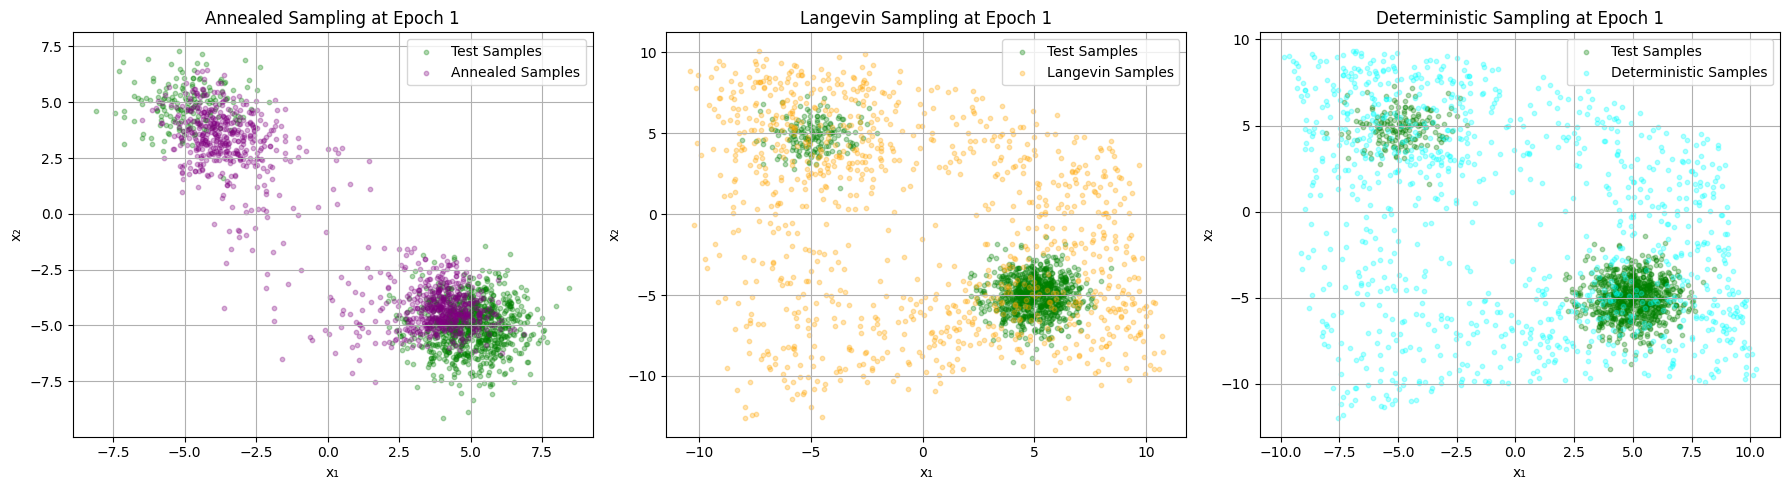

Training Progress:  99%|█████████▉| 99/100 [01:27<00:01,  1.10s/it]

Epoch 100/100, Loss: 0.268810


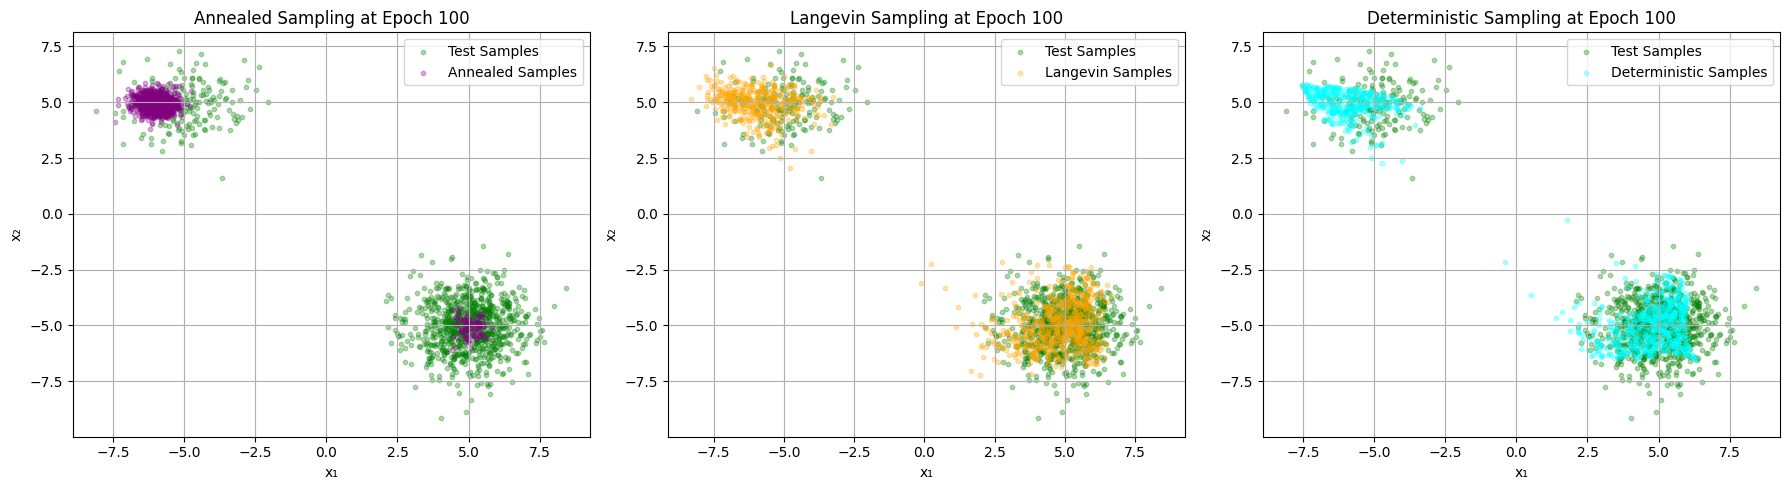

Training Progress: 100%|██████████| 100/100 [01:43<00:00,  1.03s/it]
<ipython-input-62-368586b7eaec>:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(

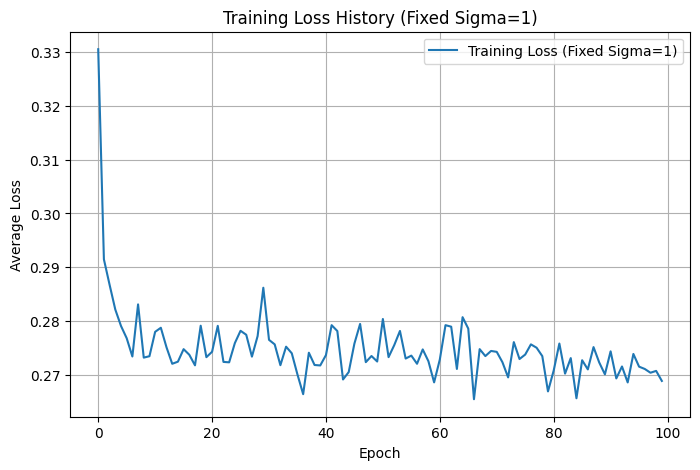


Visualizing score fields for Sigma=1...
Plotting score field for sigma=1


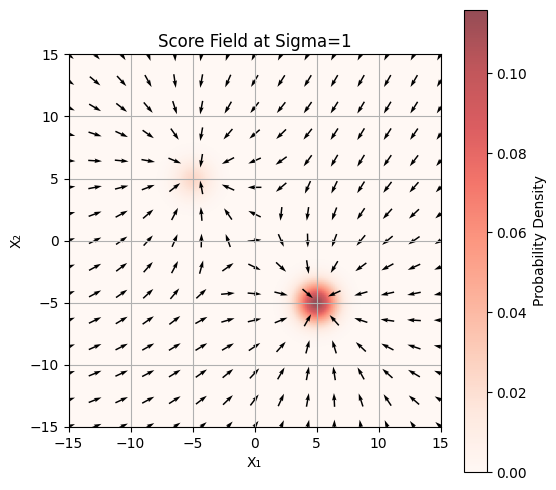


Performing sampling with fixed sigma=1...


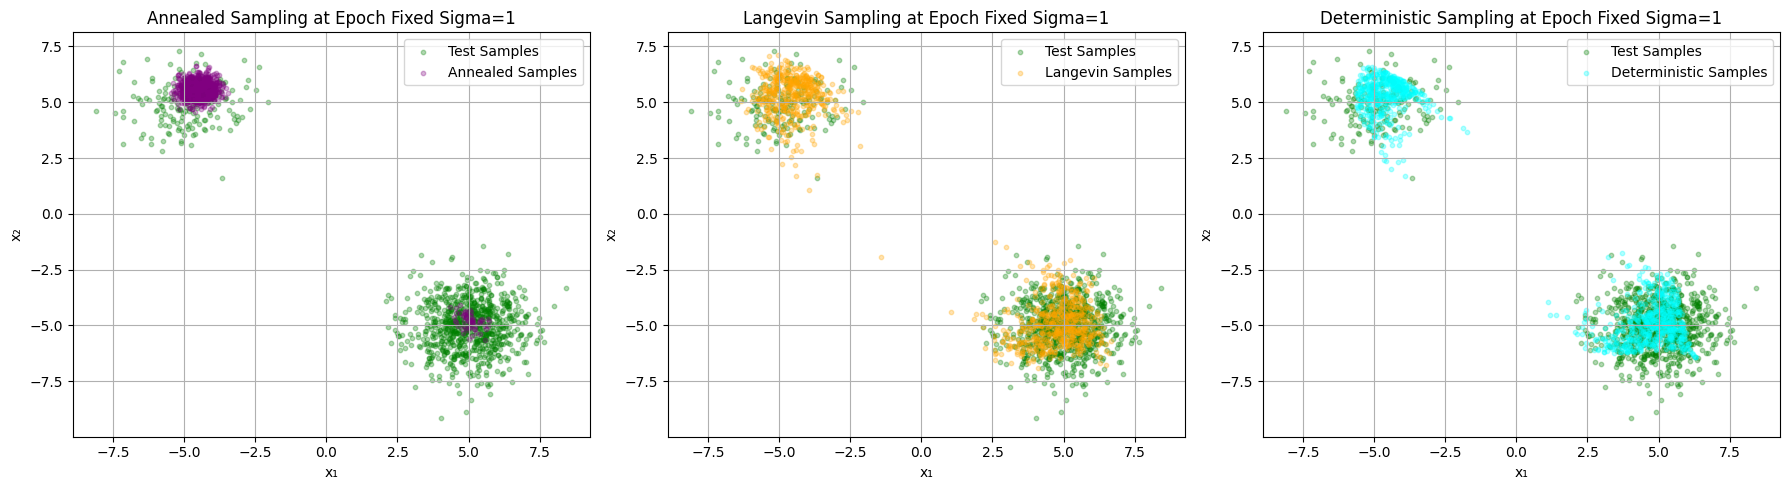


--- Phase 1: Training with Fixed Sigma=3 ---

Training ScoreNet with fixed sigma=3...


Training Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Loss: 0.045335


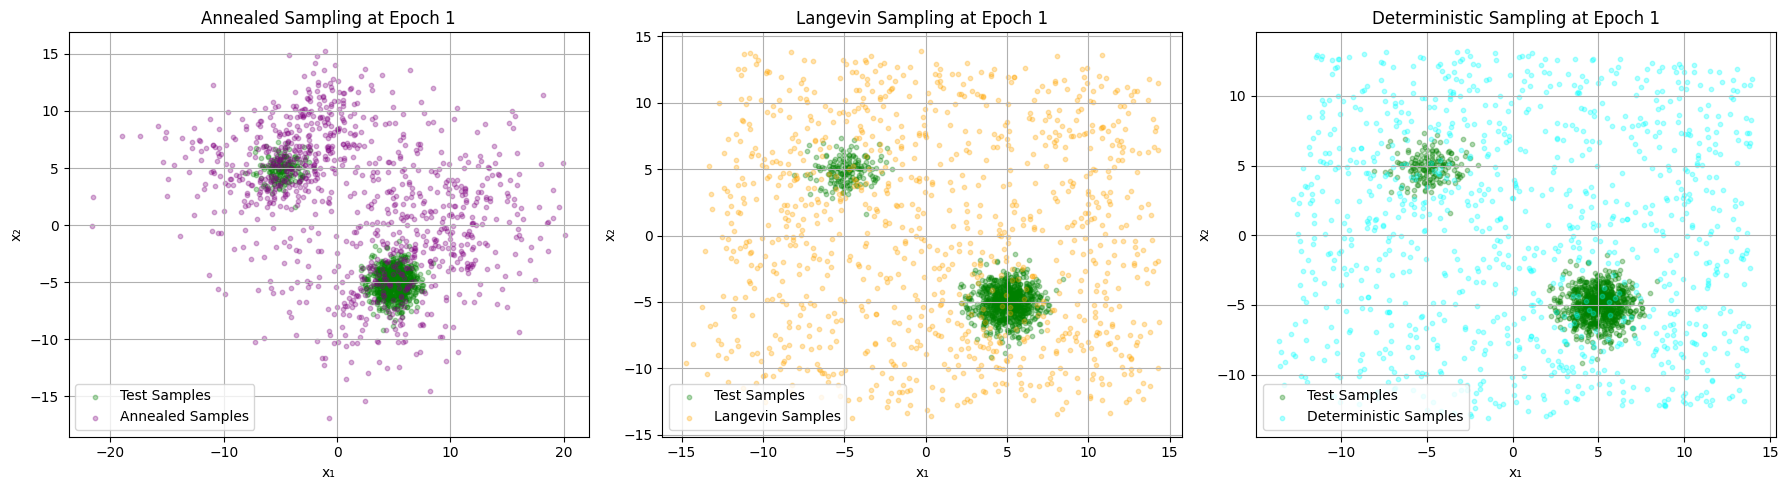

Training Progress:  99%|█████████▉| 99/100 [01:19<00:00,  1.46it/s]

Epoch 100/100, Loss: 0.011861


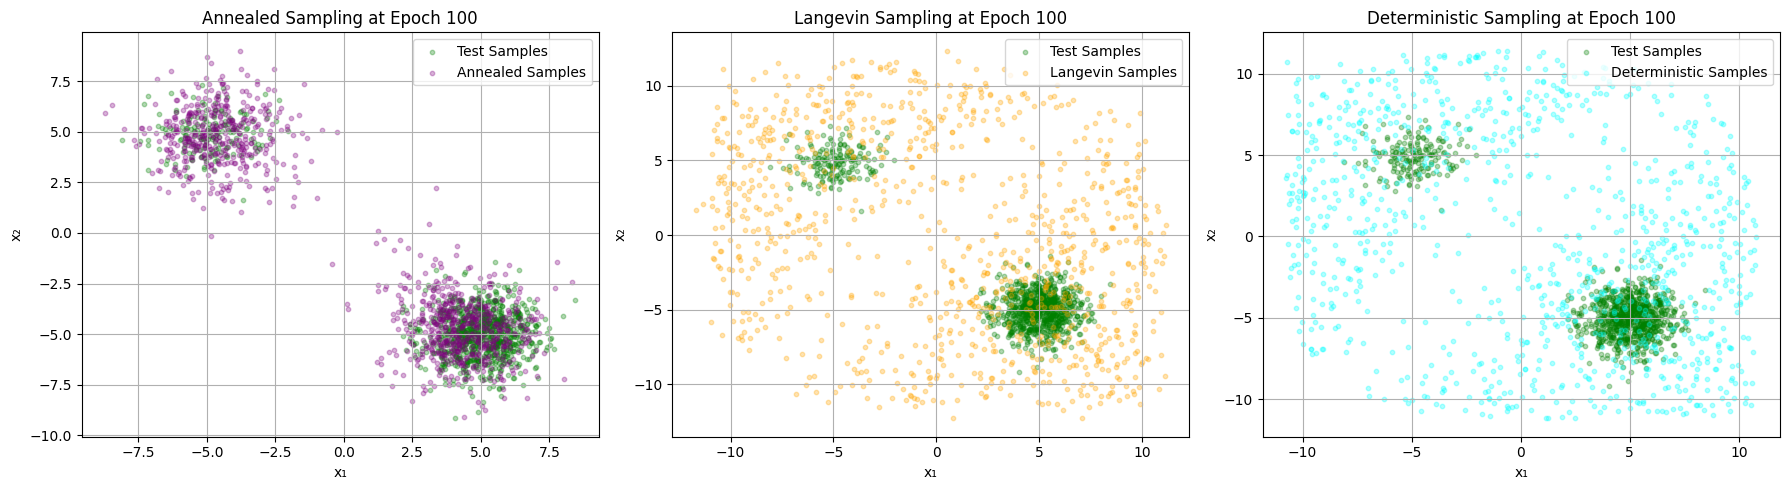

Training Progress: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


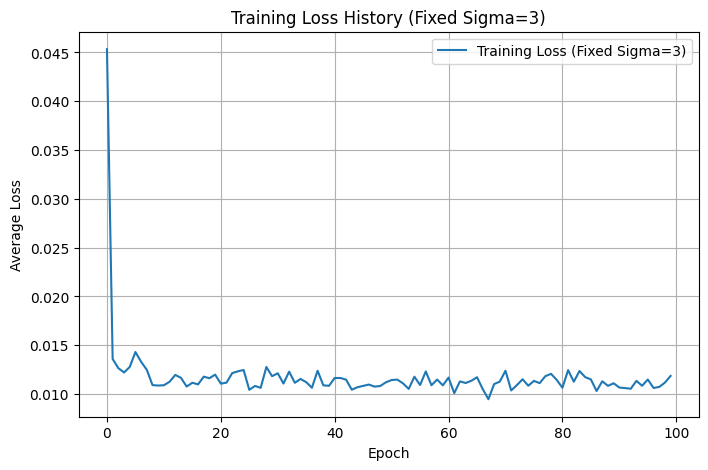


Visualizing score fields for Sigma=3...
Plotting score field for sigma=3


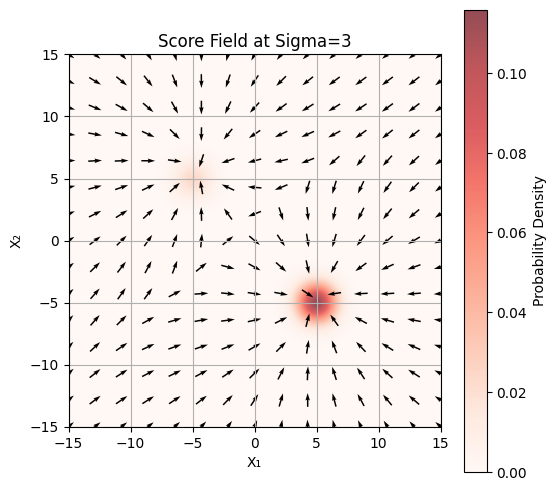


Performing sampling with fixed sigma=3...


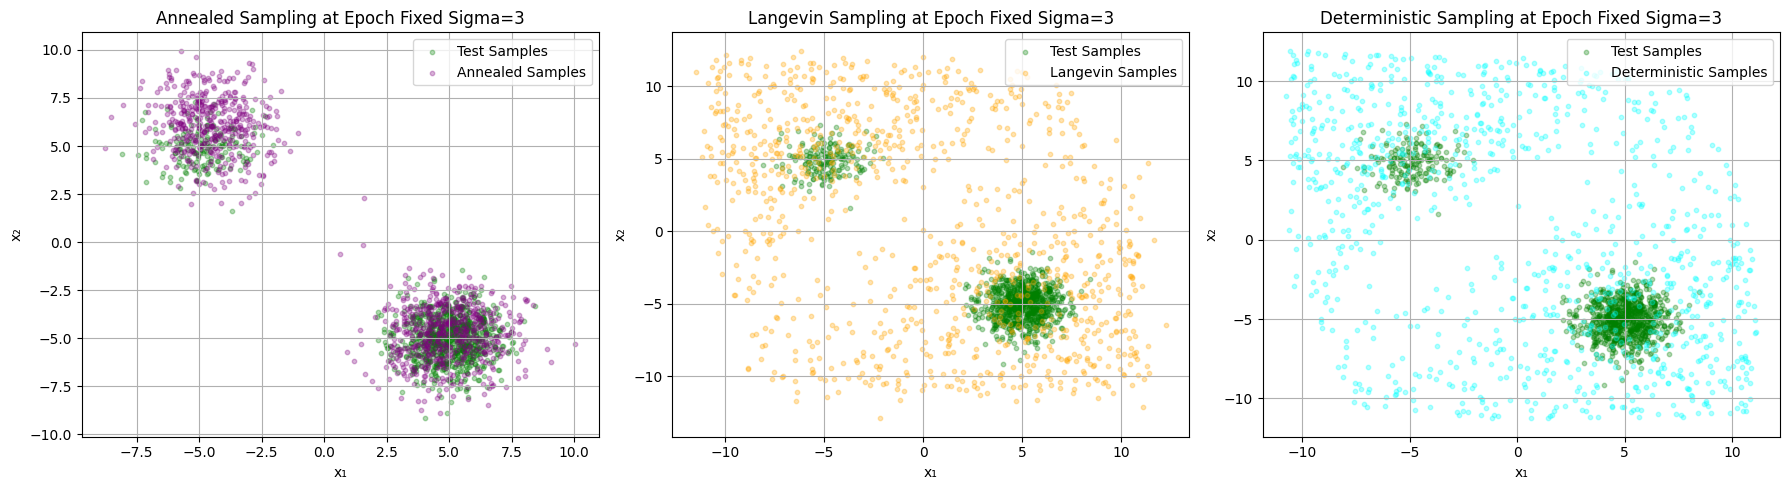


--- Phase 1: Training with Fixed Sigma=7 ---

Training ScoreNet with fixed sigma=7...


Training Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Loss: 0.040102


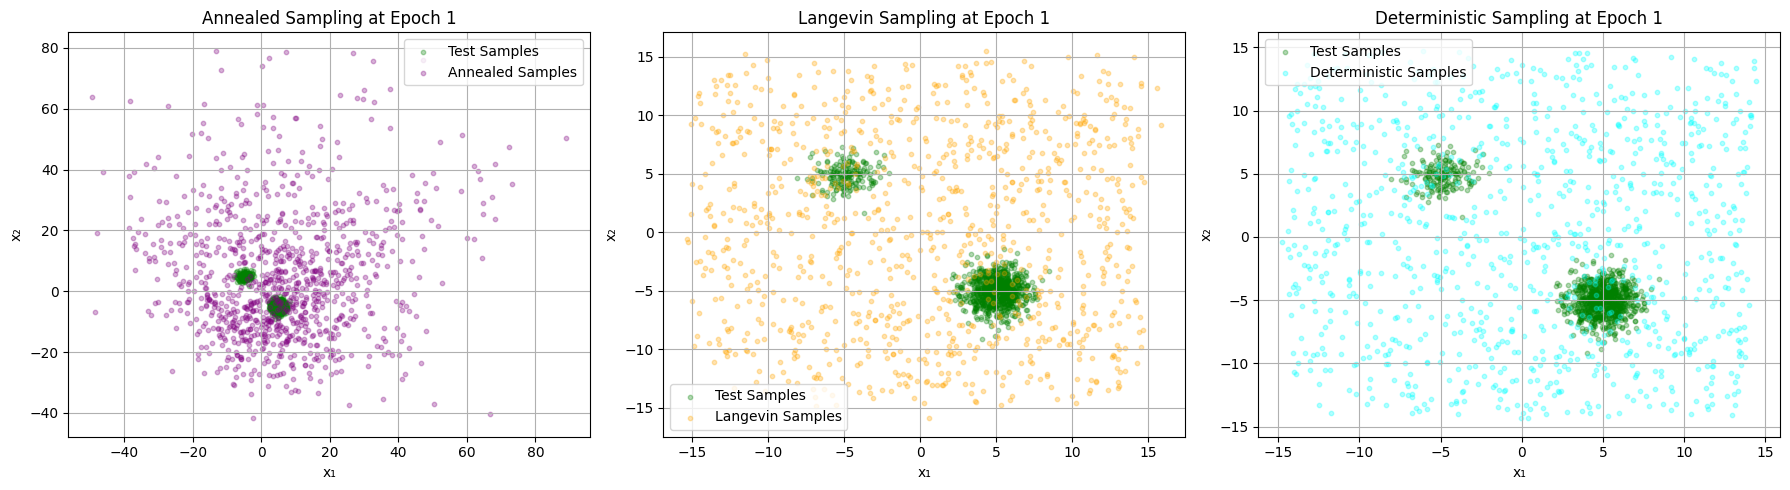

Training Progress:  99%|█████████▉| 99/100 [01:19<00:00,  1.53it/s]

Epoch 100/100, Loss: 0.002063


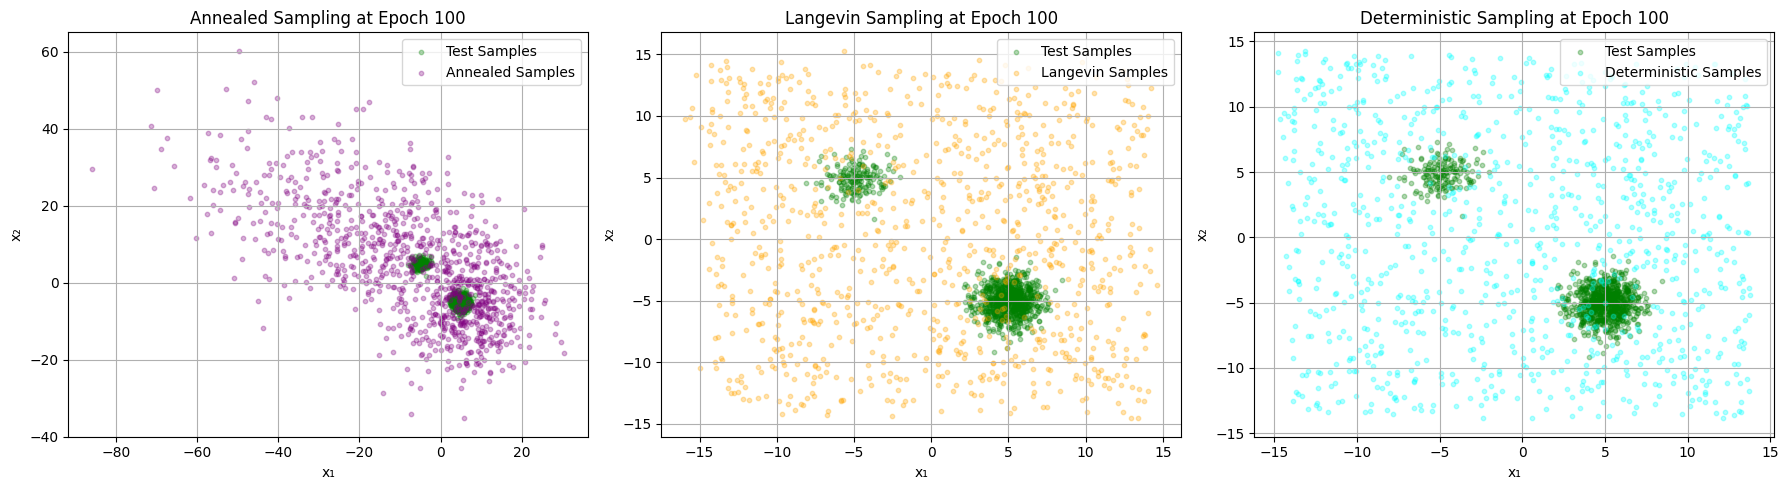

Training Progress: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


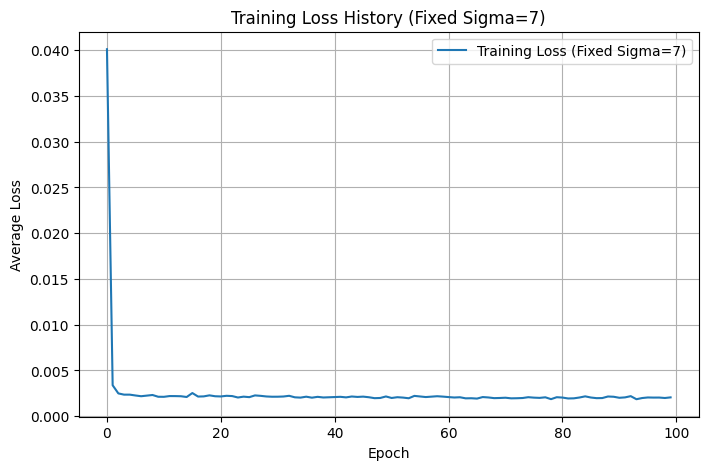


Visualizing score fields for Sigma=7...
Plotting score field for sigma=7


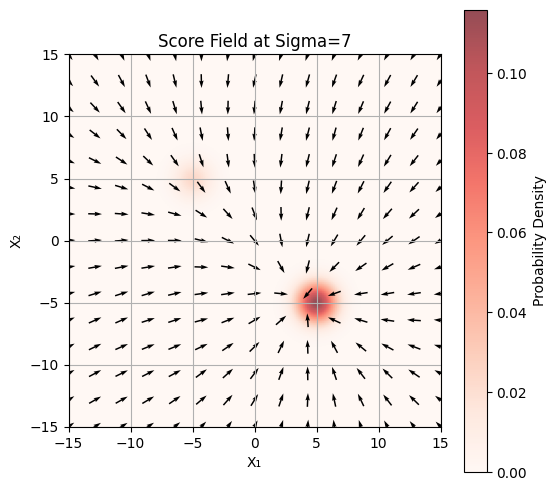


Performing sampling with fixed sigma=7...


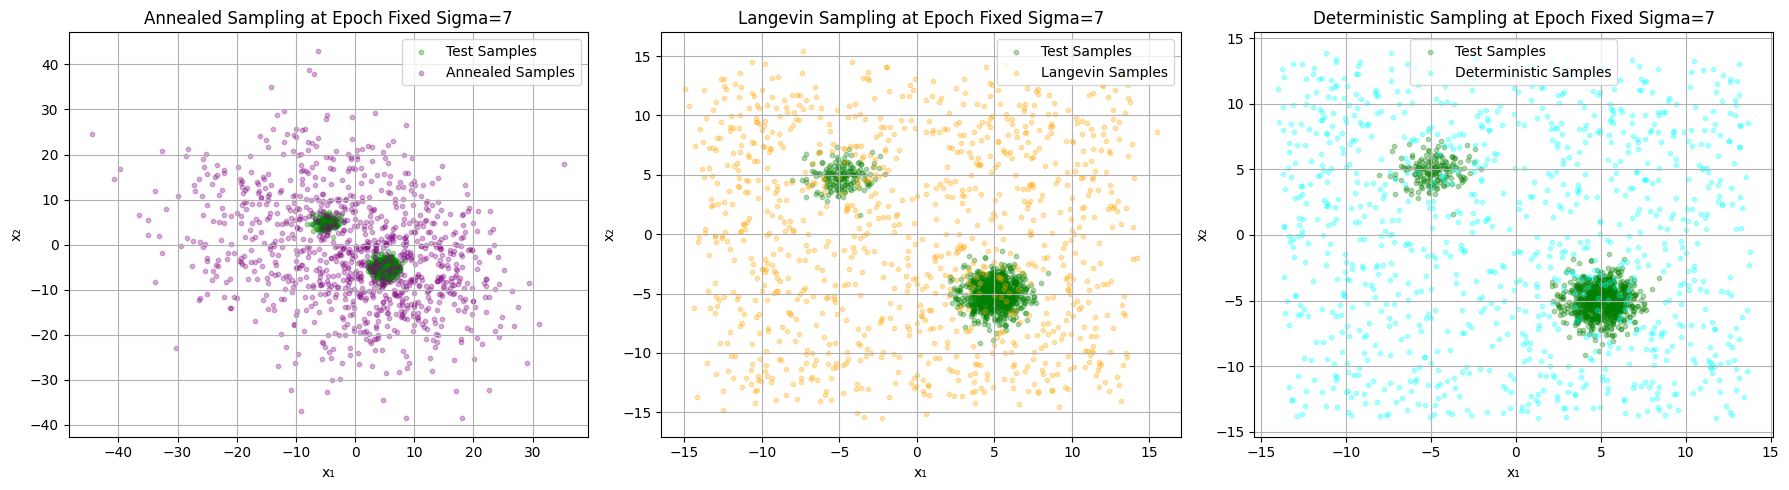

In [66]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

sigma_values = [1, 3, 7]
models = {}
loss_histories = {}

for sigma in sigma_values:
    print(f"\n--- Phase 1: Training with Fixed Sigma={sigma} ---\n")

    model = ScoreNet(input_dim=3, hidden_dim=256, num_layers=6)
    print(f"Training ScoreNet with fixed sigma={sigma}...")

    train_data = torch.tensor(train_samples).float()
    dataset = TensorDataset(train_data)
    data_loader = DataLoader(dataset, batch_size=256, shuffle=True, num_workers=2)

    model, loss_history = train_score_model(
        model,
        data_loader,
        sigma_schedule=None,
        epochs=100,
        learning_rate=0.001,
        scheduler_step=100,
        scheduler_gamma=0.5,
        clip_grad=1.0,
        patience=100,
        fixed_sigma=sigma
    )

    models[sigma] = model
    loss_histories[sigma] = loss_history

    plt.figure(figsize=(8, 5))
    plt.plot(loss_history, label=f'Training Loss (Fixed Sigma={sigma})')
    plt.xlabel("Epoch")
    plt.ylabel("Average Loss")
    plt.title(f"Training Loss History (Fixed Sigma={sigma})")
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"\nVisualizing score fields for Sigma={sigma}...")
    plot_score_field_individual(model, params, extent=extent, sigma_values=[sigma], save_plots=False)

    print(f"\nPerforming sampling with fixed sigma={sigma}...")
    perform_sampling_and_plot(model, epoch=f'Fixed Sigma={sigma}', num_points=1000)



### Explanation of the Code Block:

---

This block of code trains a score-based model using a **fixed sigma value** (\( \sigma = 1 \)) and evaluates the sampling behavior from two different starting points.

---

### **Workflow Explanation**

#### **1. Model Training with Fixed Sigma**
1. **Model Initialization**:
   - A new instance of the `ScoreNet` model is initialized with:
     - Input dimension = 3 (2 spatial coordinates + sigma as input).
     - Hidden dimension = 256 (hidden neurons per layer).
     - Number of layers = 6 (fully connected network).
   - The model is trained using **score matching loss**.

2. **Data Preparation**:
   - The training samples (`train_samples`) are converted into a tensor dataset and loaded using a `DataLoader` with:
     - Batch size = 256.
     - Shuffling enabled to randomize data access during training.

3. **Training Process**:
   - The `train_score_model` function trains the model for:
     - 100 epochs.
     - A fixed sigma value of \( \sigma = 1 \), meaning the noise level remains constant throughout training.
   - The function also implements:
     - Gradient clipping with a max norm of 1.0.
     - Early stopping with a patience of 100 epochs.

4. **Loss History**:
   - The training loss history is tracked and stored for analysis, providing insights into model convergence.

---

#### **2. Sampling with Two Different Starting Points**
Two sets of experiments are conducted, starting from different initial points.

##### **Starting Point 1: \( [10, 20] \)**
1. **Trajectory Initialization**:
   - The starting point (\( [10, 20] \)) is defined as a NumPy array and converted into a PyTorch tensor for compatibility with the model.
   - The tensor is moved to the computation device (CPU or GPU).

2. **Deterministic Sampling**:
   - The model generates a trajectory using **deterministic sampling**:
     - At each step, the trajectory is updated deterministically based on the score function gradient without adding noise.

3. **Langevin Sampling**:
   - The model generates a trajectory using **Langevin sampling**:
     - At each step, a small amount of noise is added to the trajectory in addition to the score gradient.
     - This introduces stochasticity, allowing better exploration of the distribution.

4. **Visualization**:
   - The deterministic and Langevin trajectories are plotted on top of the background heatmap of the probability density (\( p(x) \)).
   - Each iteration in the trajectory is annotated for clarity.

##### **Starting Point 2: \( [-10, -20] \)**
- The same process is repeated with a different initial point (\( [-10, -20] \)) to analyze the model's behavior from a new location in the input space.

---

### **Expected Results**

#### **1. Trajectory Behavior**
- **Deterministic Sampling**:
  - Trajectories will follow the gradient of the score function toward high-density regions of the target distribution.
  - No noise means the trajectories are smooth and deterministic.

- **Langevin Sampling**:
  - Trajectories will also move toward high-density regions but with added randomness at each step.
  - This allows the trajectory to explore the distribution more thoroughly, which might result in slight deviations from a purely deterministic path.

#### **2. Comparison Between Starting Points**
- Starting from \( [10, 20] \) and \( [-10, -20] \), the trajectories might converge to similar regions if both initial points are far from the high-density areas of the distribution.
- However, if one point starts near a mode of the distribution, the trajectory might reach the target region faster.

#### **3. Visualization**
- The annotated trajectories provide insights into:
  - The number of steps required to reach the high-density region.
  - The influence of randomness in Langevin sampling versus the determinism of the gradient-based approach.

---

### **Key Insights**
1. **Model Behavior**:
   - The trained model successfully captures the score field of the target distribution, guiding trajectories toward high-density regions.

2. **Sampling Comparison**:
   - Langevin sampling explores the distribution more effectively due to its stochastic nature.
   - Deterministic sampling provides consistent results but may not capture the full diversity of the distribution.

3. **Practical Applications**:
   - This approach is crucial in generating samples from complex distributions, where direct sampling is intractable.

4. **Impact of Starting Points**:
   - The choice of starting points influences trajectory length and convergence behavior, demonstrating the model's ability to handle diverse inputs.

Training ScoreNet with fixed sigma=1...


Training Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Loss: 0.327940


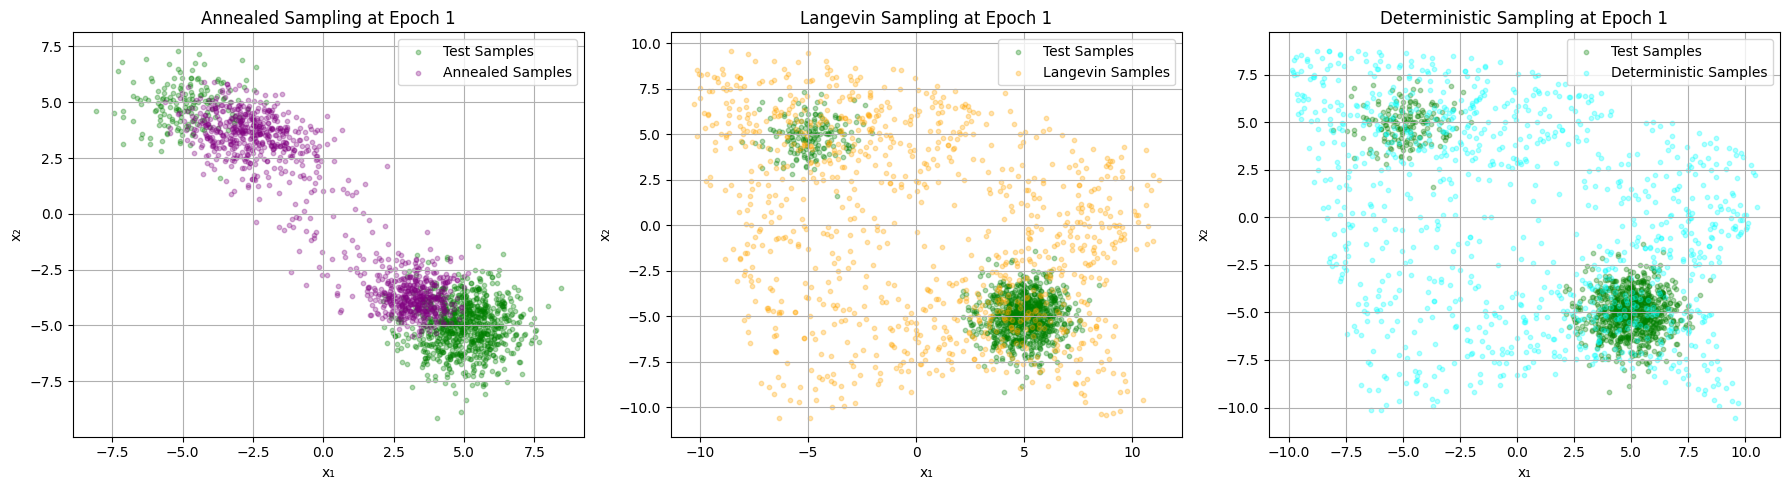

Training Progress:  99%|█████████▉| 99/100 [01:22<00:00,  1.50it/s]

Epoch 100/100, Loss: 0.272318


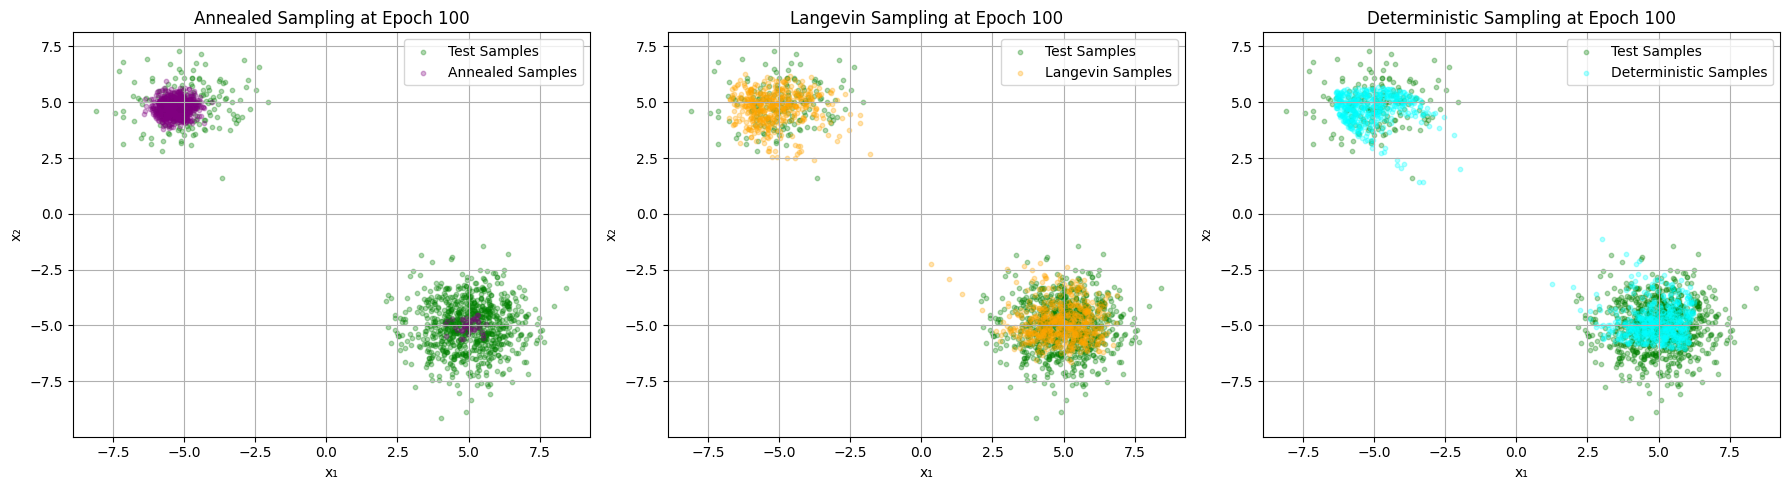

Training Progress: 100%|██████████| 100/100 [01:37<00:00,  1.02it/s]
<ipython-input-62-368586b7eaec>:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(


Visualizing Trajectories for Start Point: [10 20]


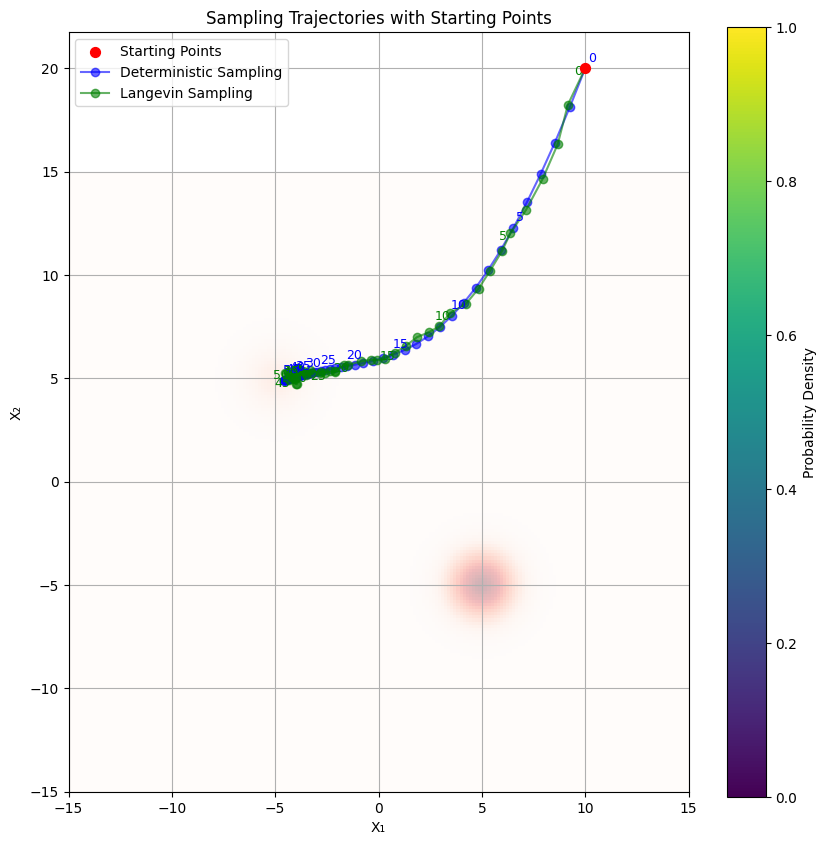


Visualizing Trajectories for Start Point: [-10 -20]


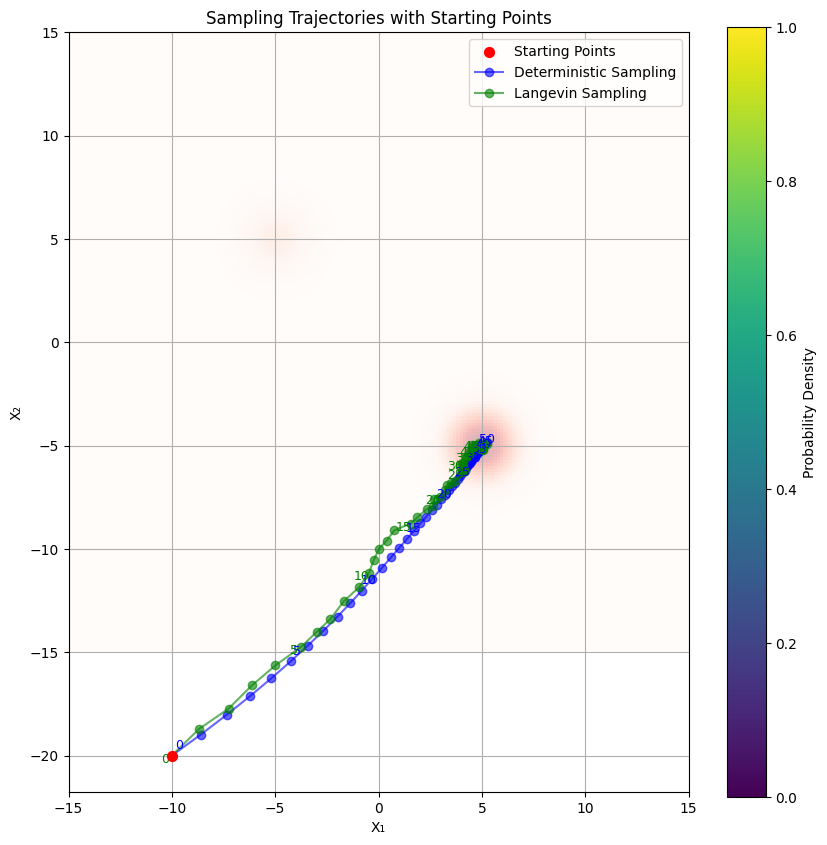


Visualizing Trajectories for Start Point: [5 5]


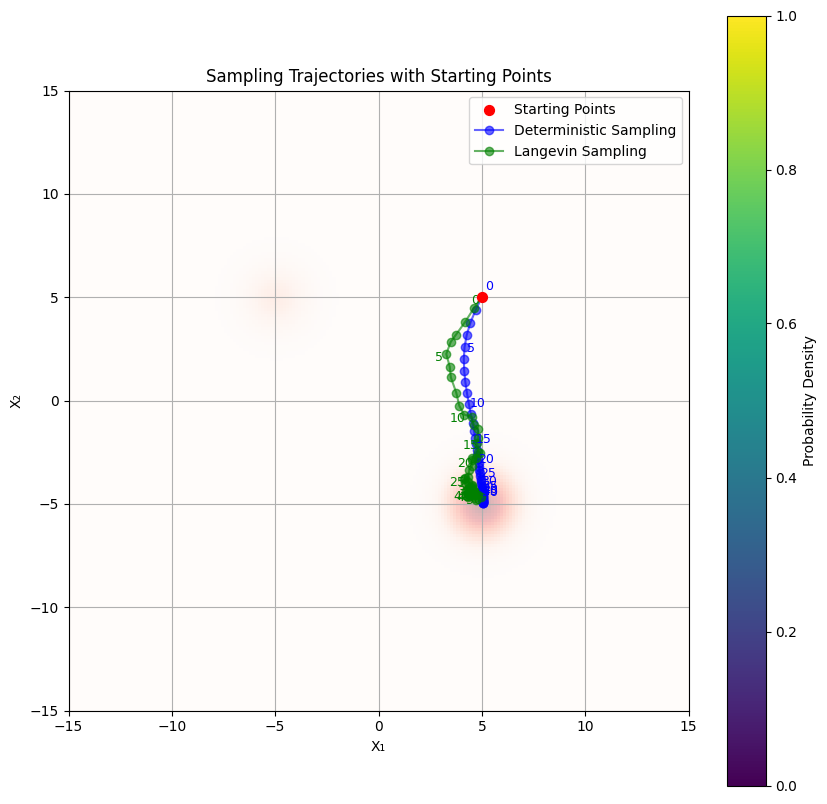


Visualizing Trajectories for Start Point: [-5 -5]


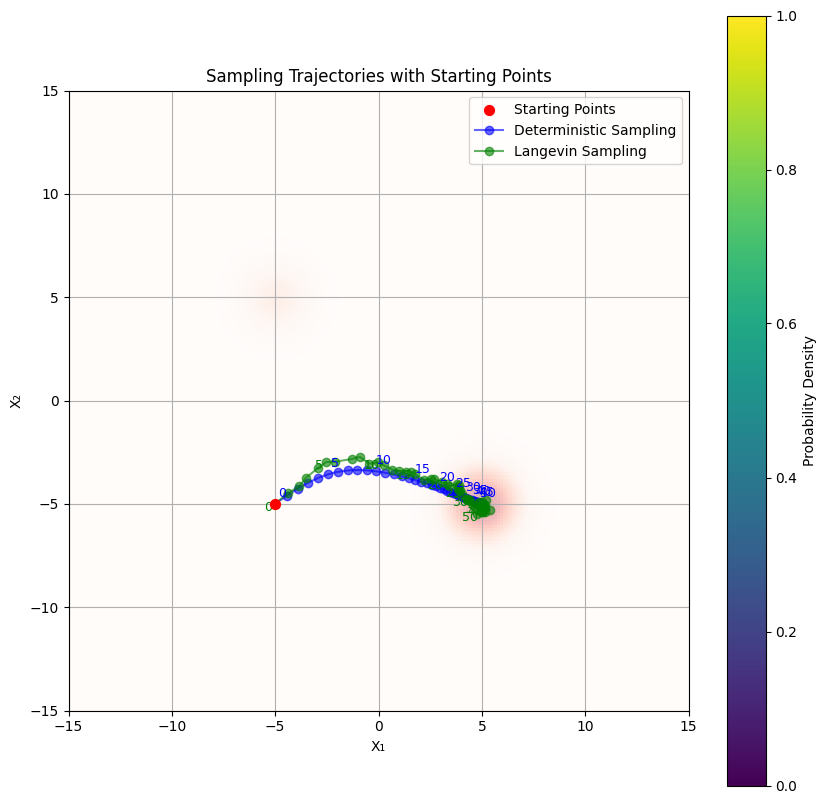


Visualizing Trajectories for Start Point: [0 0]


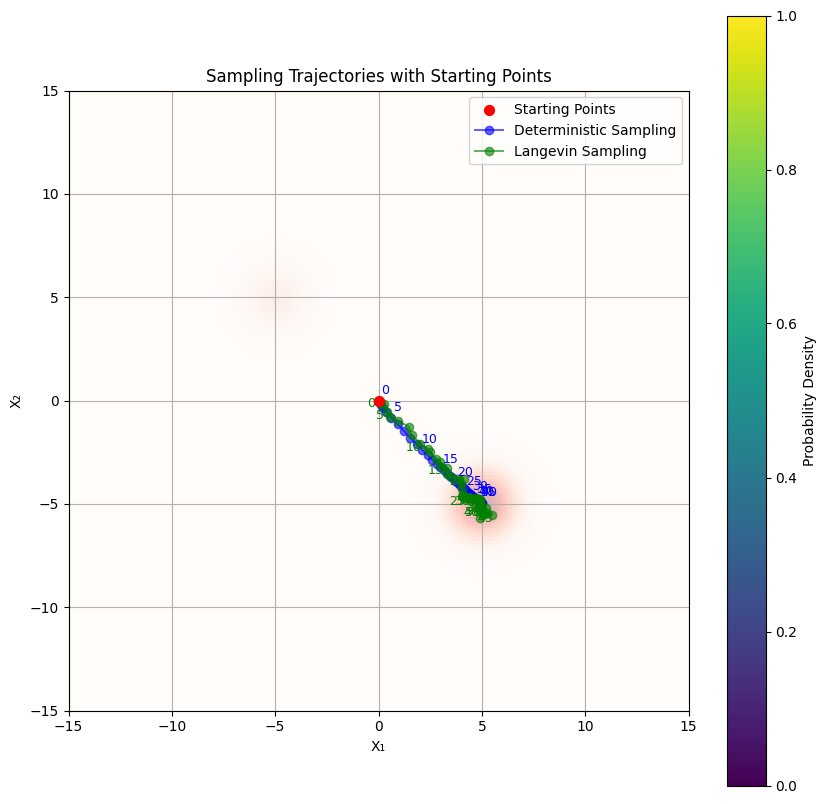

In [69]:
# Train the ScoreNet with fixed sigma=1
model = ScoreNet(input_dim=3, hidden_dim=256, num_layers=6)
print(f"Training ScoreNet with fixed sigma=1...")

train_data = torch.tensor(train_samples).float()
dataset = TensorDataset(train_data)
data_loader = DataLoader(dataset, batch_size=256, shuffle=True, num_workers=2)

model, loss_history = train_score_model(
    model,
    data_loader,
    sigma_schedule=None,
    epochs=100,
    learning_rate=0.001,
    scheduler_step=100,
    scheduler_gamma=0.5,
    clip_grad=1.0,
    patience=100,
    fixed_sigma=1
)

# Define multiple starting points
start_points = np.array([[10, 20], [-10, -20], [5, 5], [-5, -5], [0, 0]])
start_points_tensor = torch.tensor(start_points, dtype=torch.float32).to(device)

# Perform deterministic sampling for multiple starting points
deterministic_trajectories = []
for start_point in start_points_tensor:
    traj = deterministic_sampling(model, start_point.unsqueeze(0), num_steps=50, step_size=0.2)
    deterministic_trajectories.append(traj)

# Perform Langevin sampling for multiple starting points
langevin_trajectories = []
for start_point in start_points_tensor:
    traj = langevin_sampling(model, start_point.unsqueeze(0), num_steps=50, step_size=0.2)
    langevin_trajectories.append(traj)

# Plot trajectories for all starting points
for i, start_point in enumerate(start_points):
    print(f"\nVisualizing Trajectories for Start Point: {start_point}")

    plot_sampling_trajectories_with_start_points(
        start_points=np.array([start_point]),  # Visualize one start point at a time
        deterministic_traj=deterministic_trajectories[i],
        langevin_traj=langevin_trajectories[i],
        z=z,
        extent=extent,
        grid_spacing=5
    )


### Explanation of Code for Training with Varying Sigma

---

This block of code trains a **ScoreNet** model where the sigma values (\( \sigma \)) are **randomly sampled** during each training step. This allows the model to generalize across multiple noise levels, unlike training with a fixed sigma value.

---

### **1. Model and Dataset Preparation**
1. **Model Initialization**:
   - A new instance of the `ScoreNet` model is created with:
     - **Input Dimension**: 3 (2 spatial dimensions + 1 sigma).
     - **Hidden Dimension**: 256 (number of neurons per hidden layer).
     - **Number of Layers**: 6 (fully connected layers).
   - This architecture allows the model to approximate the score function for the given data distribution.

2. **Dataset and DataLoader**:
   - The training data (`train_samples`) is converted into a PyTorch tensor.
   - A `TensorDataset` is created, and a `DataLoader` is used to:
     - **Batch the Data**: Batch size = 256.
     - **Shuffle the Data**: Ensures random access to data during training.
     - **Parallel Processing**: Using multiple workers for efficient data loading.

---

### **2. Training with Random Sigma Values**
1. **Training Function**:
   - The `train_score_model` function is called to train the model. It:
     - Randomly samples sigma values (\( \sigma \)) for each batch within the range \([1, 20]\).
     - Uses the **Score Matching Loss** to optimize the model parameters.

2. **Key Training Parameters**:
   - **Epochs**: 1000 iterations over the dataset.
   - **Learning Rate**: \( 0.001 \), controls the speed of parameter updates.
   - **Gradient Clipping**: Limits gradient magnitude to avoid exploding gradients (\( \text{max norm} = 1.0 \)).
   - **Scheduler**:
     - Decays the learning rate by a factor of \( 0.5 \) every 500 steps.
   - **Patience**: Implements early stopping if no improvement in the loss is observed for 200 epochs.

3. **Random Sigma Sampling**:
   - In each batch, sigma values are sampled from a uniform integer range \([1, 20]\), ensuring the model learns to handle a range of noise levels.

---

### **3. Loss Tracking and Early Stopping**
1. **Loss History**:
   - The loss for each epoch is stored in `loss_history_varying_sigma`, which can be used for visualization and analysis.

2. **Early Stopping**:
   - If the model does not improve after 200 epochs, training halts early to prevent overfitting or wasting computational resources.

---

### **Expected Behavior of the Model**
1. **Adaptability**:
   - The model learns to estimate the score function for multiple noise levels, making it more robust compared to training with a fixed sigma.

2. **Generalization**:
   - The trained model can effectively handle both high and low sigma values, enabling better sampling performance.

3. **Loss Convergence**:
   - The loss is expected to converge gradually as the model learns to approximate the score function accurately.

---

### **Next Steps**
After training, the model can be evaluated through:
1. **Score Field Visualization**:
   - Examine how well the model estimates the gradient of the log-density for different sigma values.
2. **Sampling Methods**:
   - Use the model for Langevin sampling, deterministic sampling, and annealed sampling to generate data points.

Training Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/1000, Loss: 0.066374


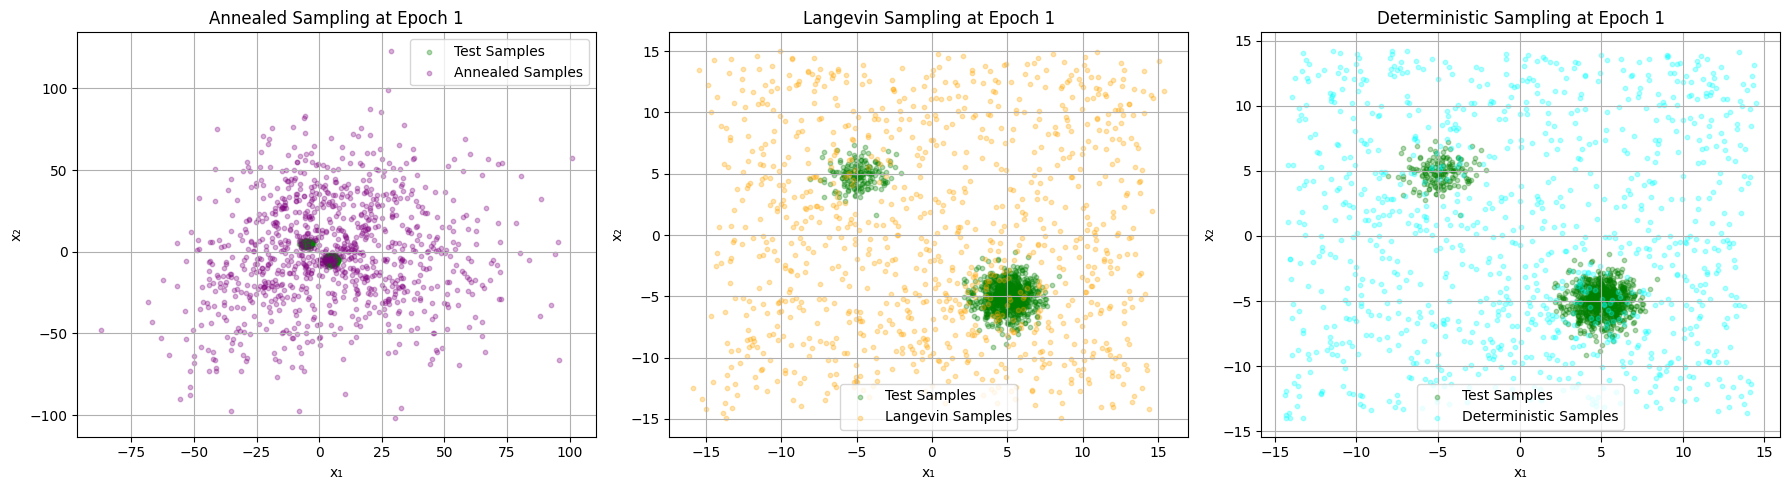

Training Progress:  10%|▉         | 99/1000 [01:20<09:32,  1.57it/s]

Epoch 100/1000, Loss: 0.021640


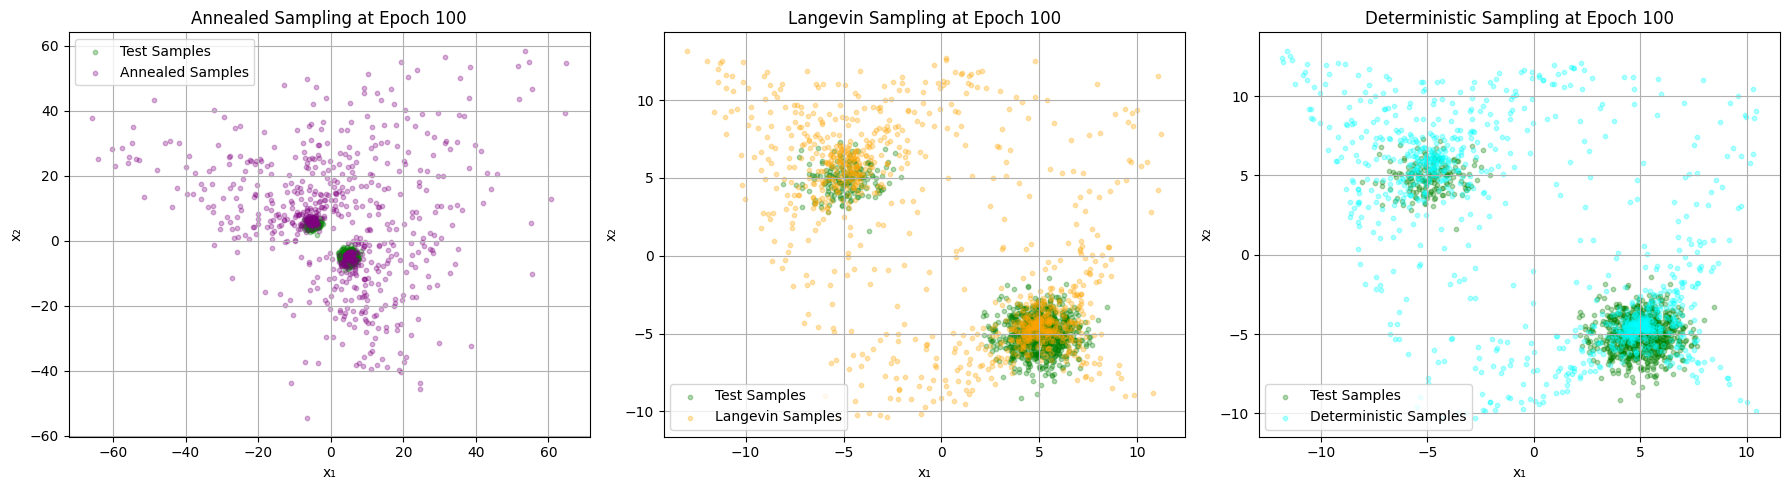

Training Progress:  20%|█▉        | 199/1000 [02:41<08:14,  1.62it/s]

Epoch 200/1000, Loss: 0.017978


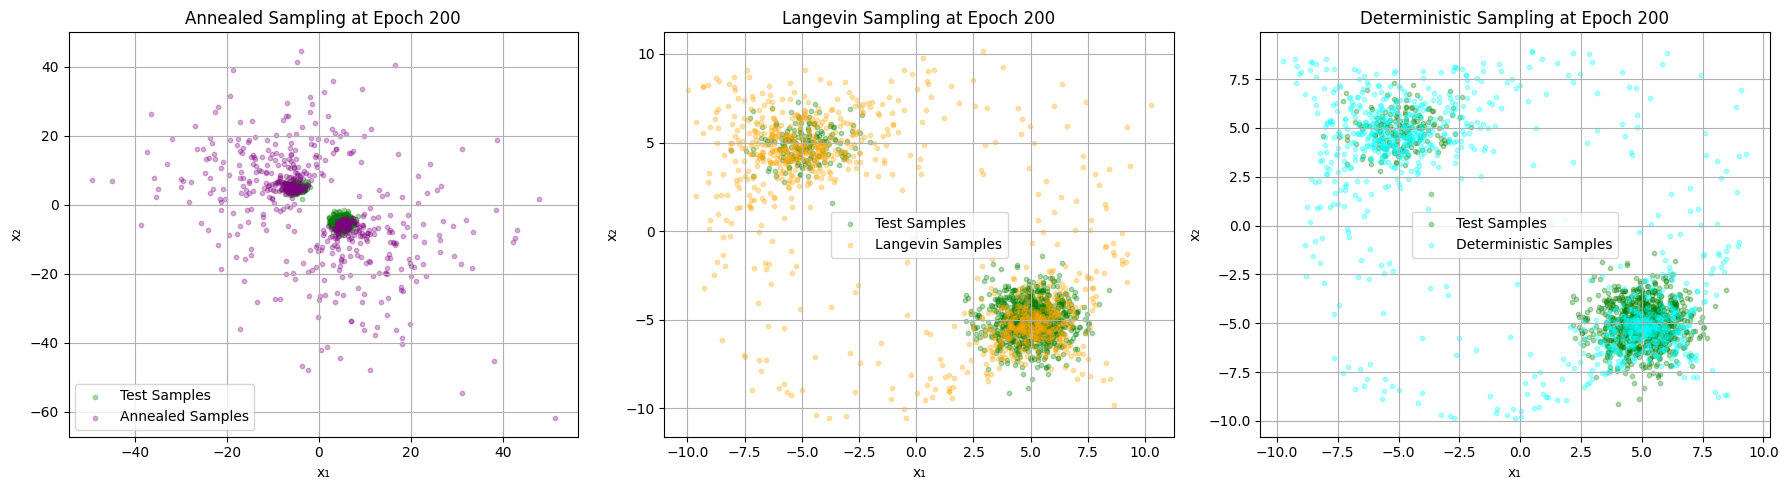

Training Progress:  30%|██▉       | 299/1000 [04:01<07:40,  1.52it/s]

Epoch 300/1000, Loss: 0.020751


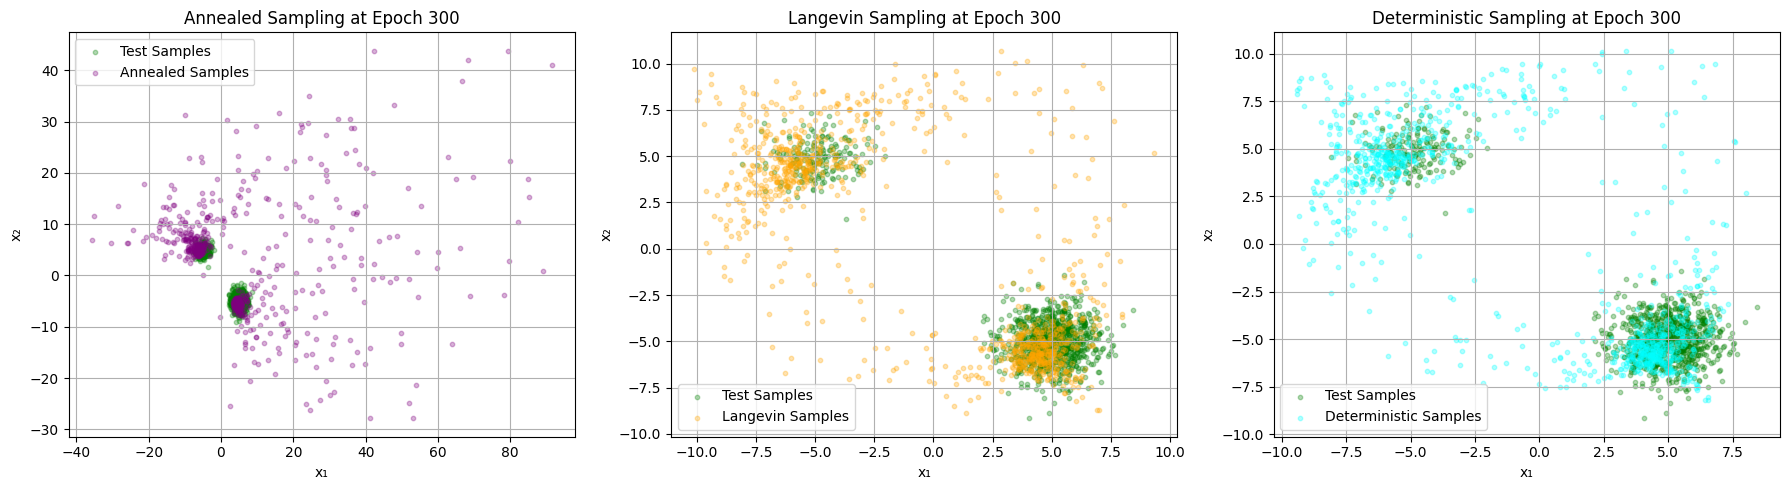

Training Progress:  40%|███▉      | 399/1000 [05:21<08:00,  1.25it/s]

Epoch 400/1000, Loss: 0.017566


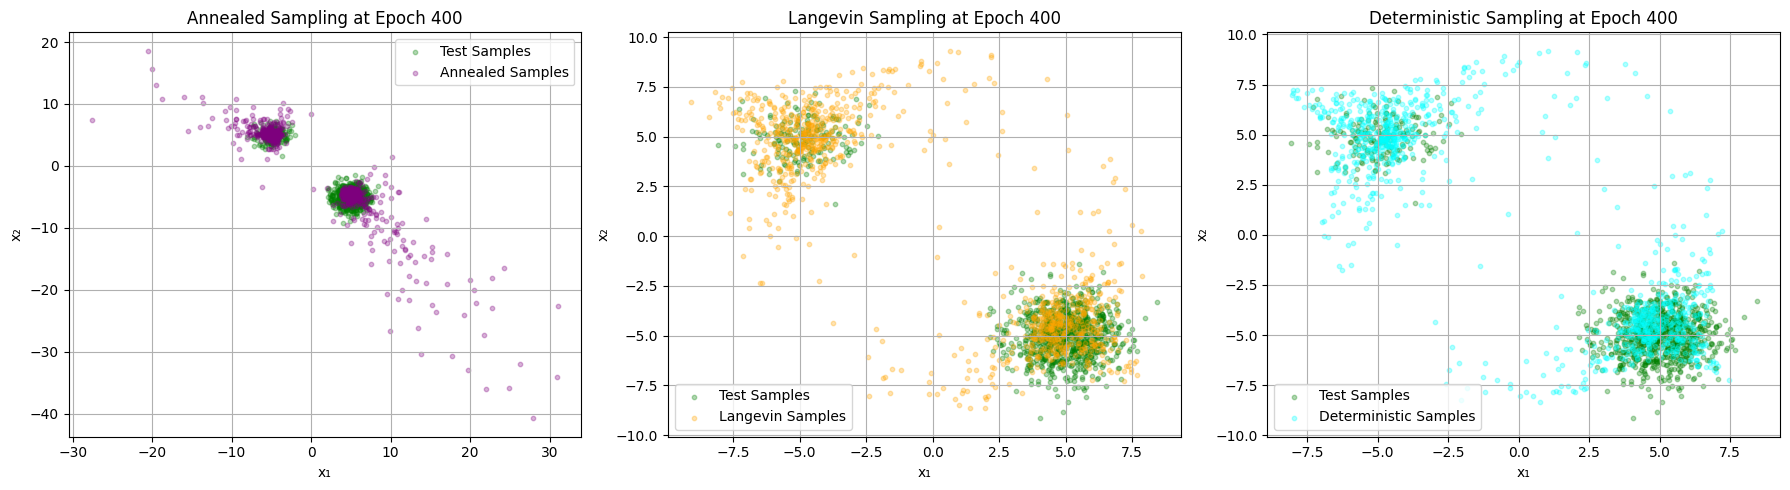

Training Progress:  50%|████▉     | 499/1000 [06:41<06:21,  1.31it/s]

Epoch 500/1000, Loss: 0.020670


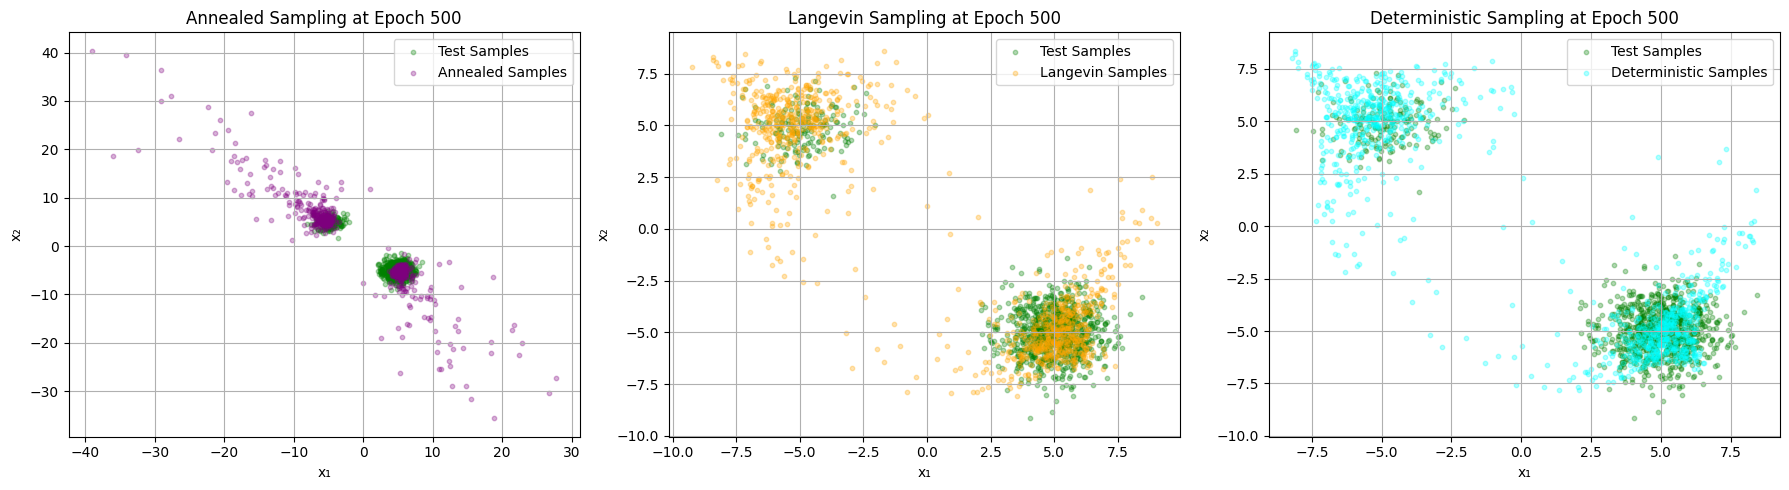

Training Progress:  60%|█████▉    | 599/1000 [08:02<04:19,  1.54it/s]

Epoch 600/1000, Loss: 0.020269


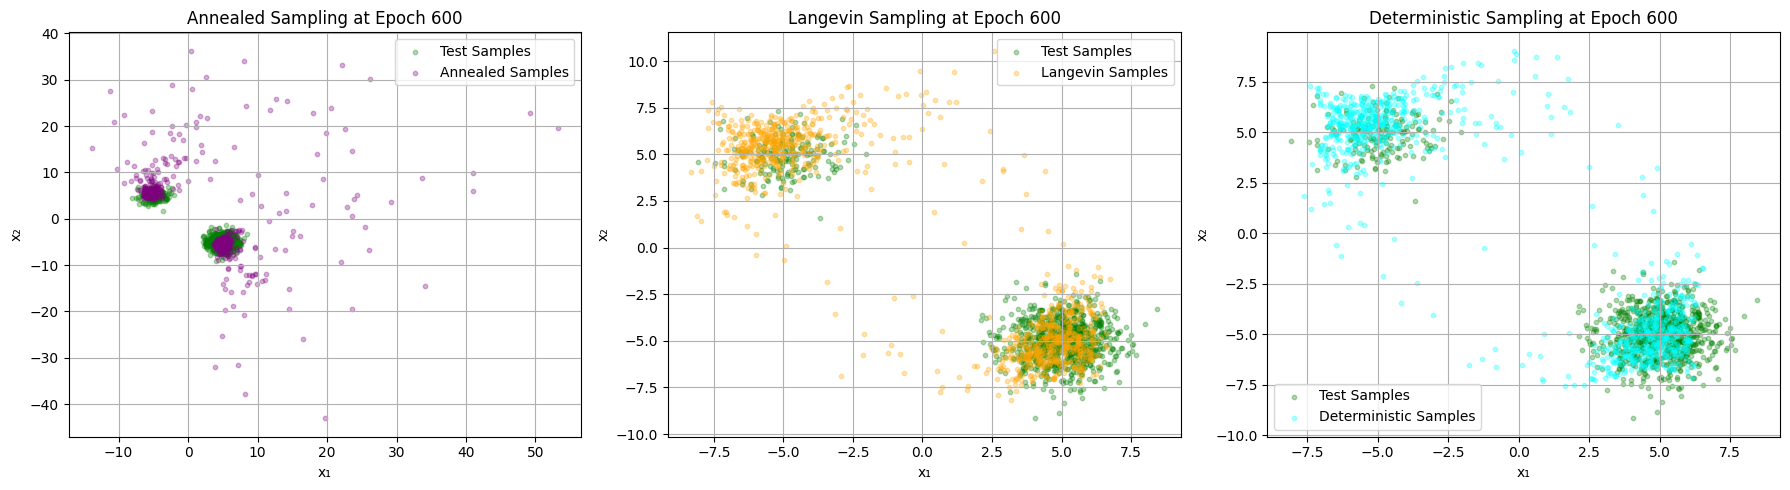

Training Progress:  70%|██████▉   | 699/1000 [10:13<04:10,  1.20it/s]

Epoch 700/1000, Loss: 0.018625


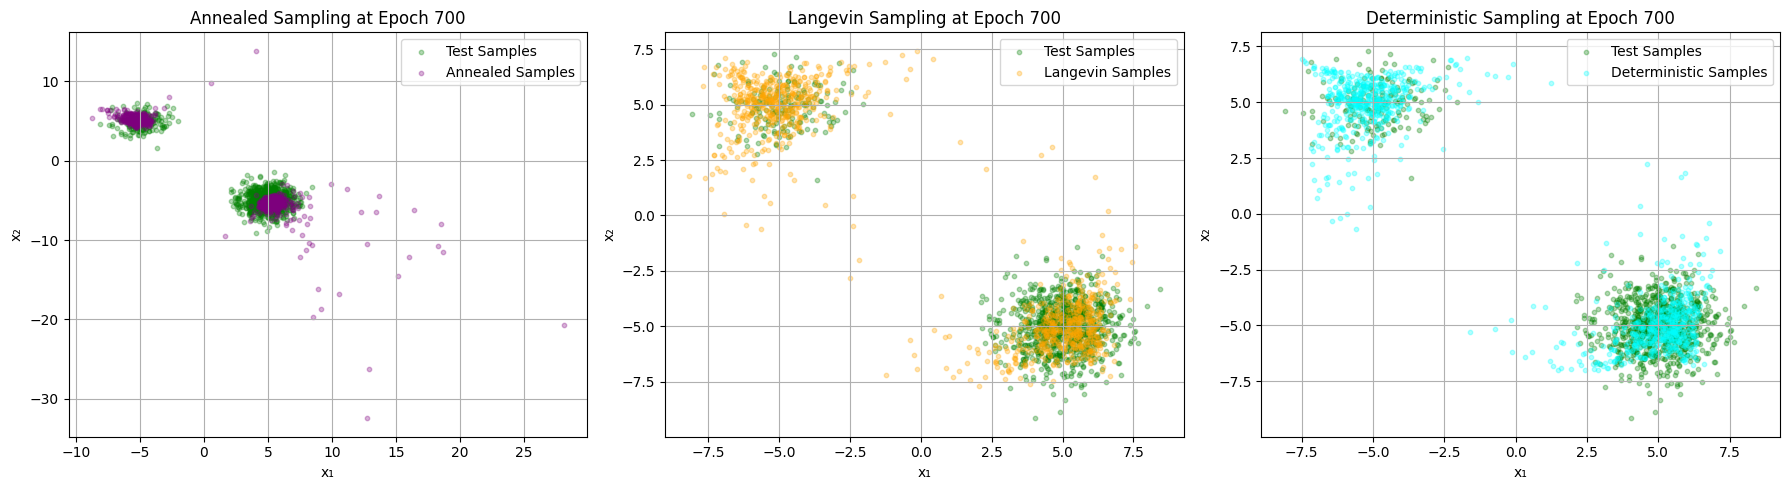

Training Progress:  80%|███████▉  | 799/1000 [11:36<02:31,  1.33it/s]

Epoch 800/1000, Loss: 0.020360


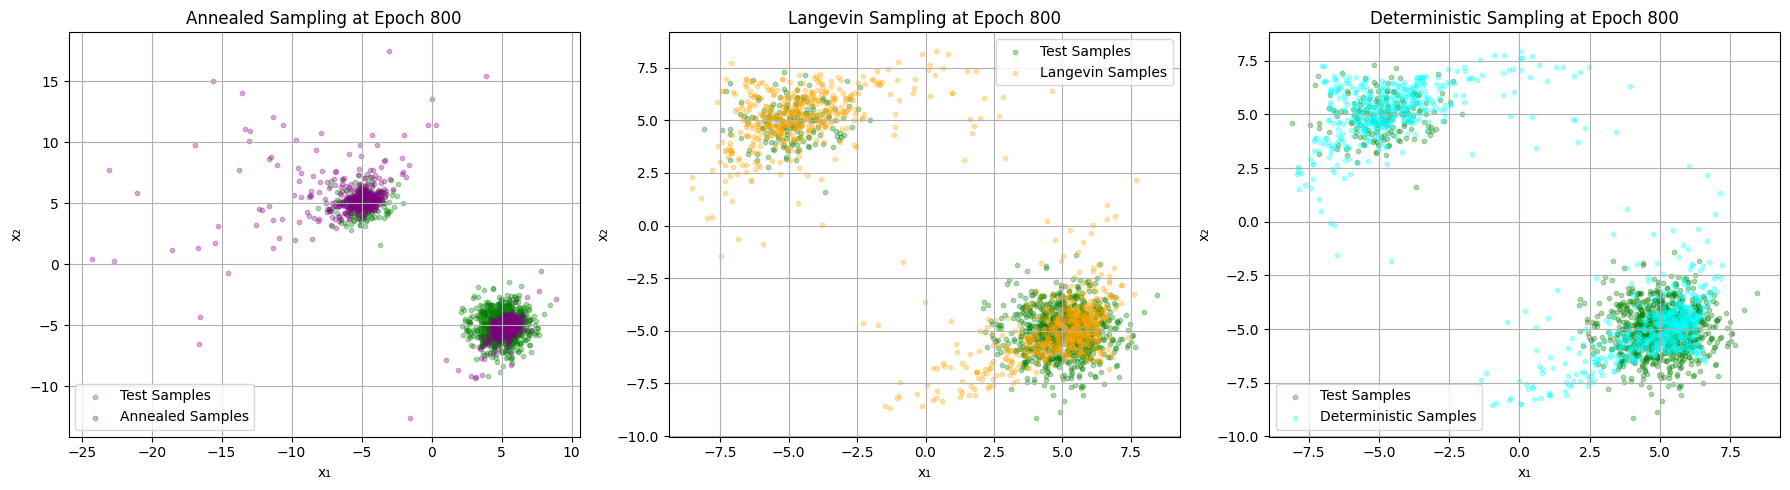

Training Progress:  90%|████████▉ | 899/1000 [12:58<01:11,  1.41it/s]

Epoch 900/1000, Loss: 0.018659


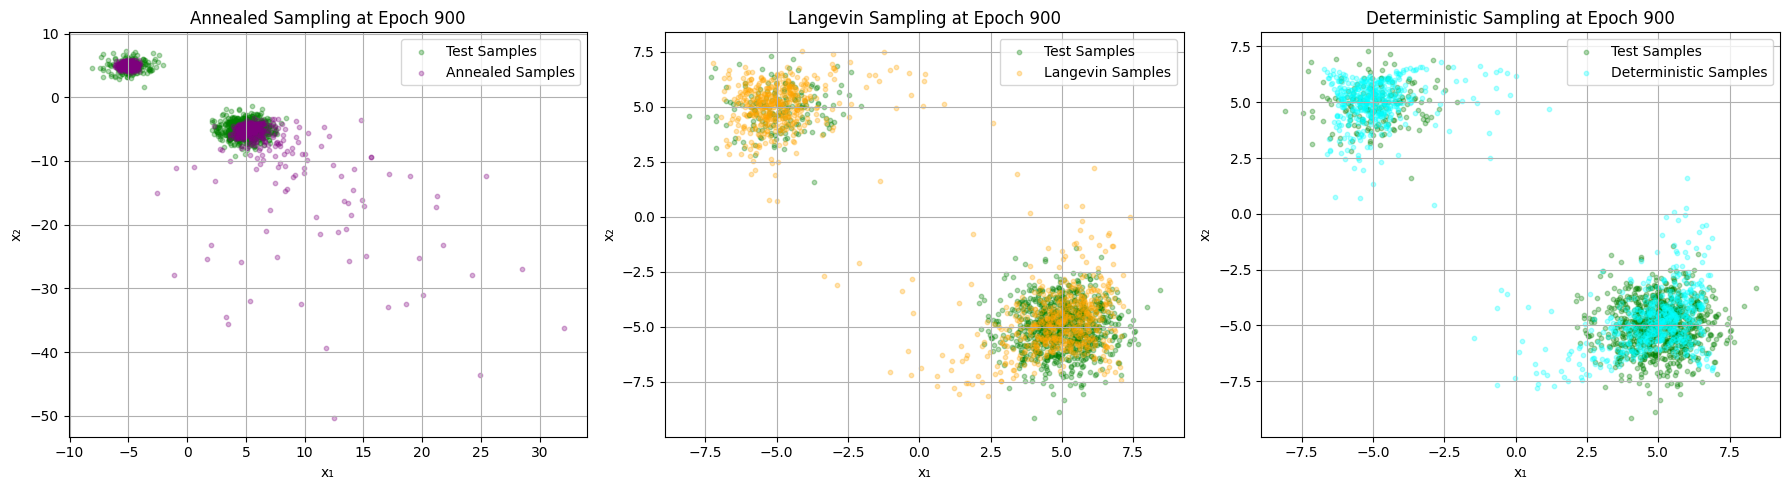

Training Progress: 100%|█████████▉| 999/1000 [14:21<00:00,  1.43it/s]

Epoch 1000/1000, Loss: 0.018004


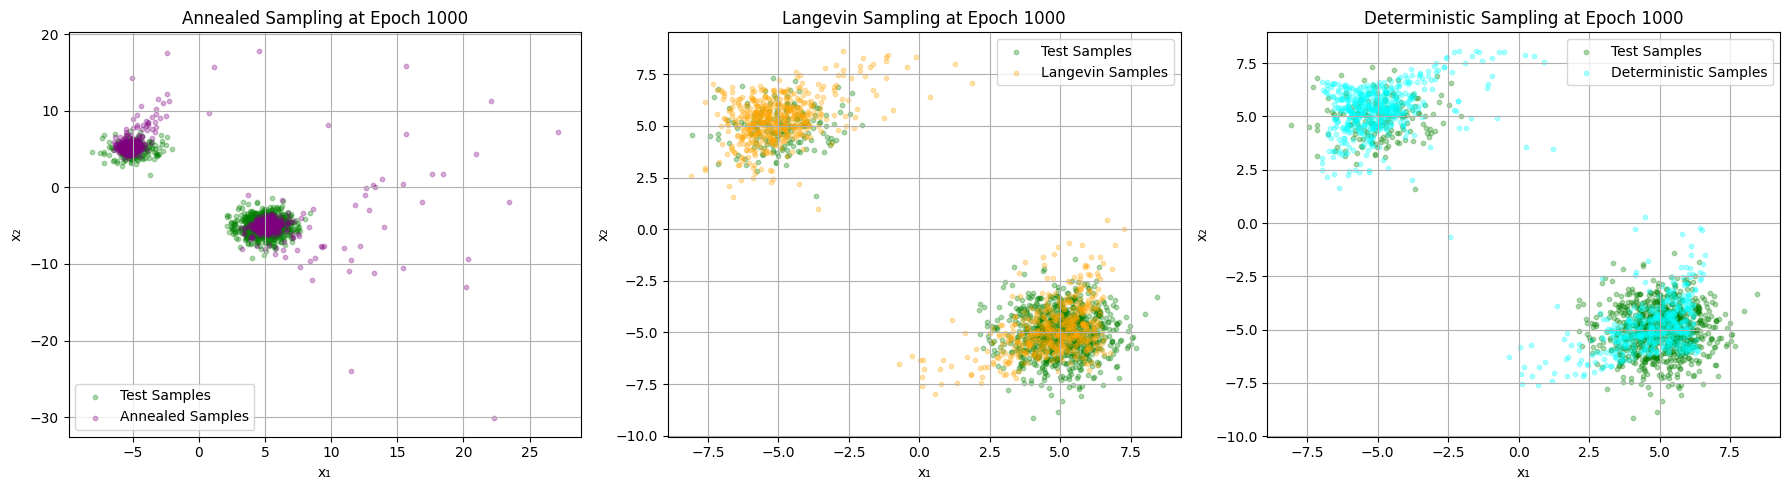

Training Progress: 100%|██████████| 1000/1000 [14:37<00:00,  1.14it/s]
<ipython-input-62-368586b7eaec>:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dic

In [68]:

epochs = 1000
patience = 200

model_varying_sigma = ScoreNet(input_dim=3, hidden_dim=256, num_layers=6)

train_data = torch.tensor(train_samples).float()
dataset = TensorDataset(train_data)
data_loader = DataLoader(dataset, batch_size=256, shuffle=True, num_workers=2)

model_varying_sigma, loss_history_varying_sigma = train_score_model(
    model=model_varying_sigma,
    data_loader=data_loader,
    sigma_schedule=None,
    epochs=epochs,
    learning_rate=0.001,
    scheduler_step=500,
    scheduler_gamma=0.5,
    clip_grad=1.0,
    patience=patience,
    fixed_sigma=None
)




